<a href="https://colab.research.google.com/github/khushishah03/Mini-project-Smartknower/blob/master/BE_Major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import drive
drive.mount('/content/drive')   

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import warnings
import numpy as np
from numpy import array
import pandas as pd
from pandas import concat
import math
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import ParameterGrid
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
pd.plotting.register_matplotlib_converters()

In [56]:
warnings.filterwarnings("ignore")

In [57]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [58]:
df=pd.read_excel('/content/drive/MyDrive/BE MAJOR PROJECT/New Forecasting Dataset.xlsx',index_col='WEEK',parse_dates=True)

In [59]:
df.head()

AMARYL M 1MG 15T  AZULIX 1MF 15 TAB  AZULIX 2MF 10T  \
WEEK                                                        
1                   11                  7               7   
2                   12                  6              11   
3                   10                  3               8   
4                    8                  2               9   
5                   13                  7              10   

      AZULIX 2MF FORTE 10T  EUCLIDE 80 10T  EUCLIDE-M 10T  GALVUS 50MG 15T  \
WEEK                                                                         
1                       12               8              3                4   
2                        8               5              3                8   
3                       13              13              2                3   
4                        5              11              7                7   
5                        9               6              6                8   

      GALVUS MET 50/1000 10T  GALVUS MET 50/500MG 15  GEMER 1MG 10T  ...  \
WEEK                                                                 ...   
1                          8                      14             22  ...   
2                          6                       9             19  ...   
3                         10                      10             19  ...   
4                          9                       7             29  ...   
5                          6                      11             20  ...   

      GLIMESTAR M2 10T  GLIMIPREX MF 1/500 10T  GLIMIPREX MF 2/500 10T  \
WEEK                                                                     
1                   12                      14                      19   
2                   10                      12                      45   
3                    9                       9                      47   
4                    6                      11                      42   
5                   10                      13                      29   

      GLIMISAVE M1 15T  GLIMISAVE M2 15T  GLIMISAVE M2 FORTE 15T  \
WEEK                                                               
1                   30                49                      40   
2                   27                40                      38   
3                   27                40                      39   
4                   43                28                      38   
5                   29                40                      39   

      GLYCIPHAGE 500MG 20T  GLYCIPHAGE SR 500 10T  GLYCIPHAGE SR 1GM 10T  \
WEEK                                                                       
1                       26                     13                     12   
2                       31                     17                      5   
3                       45                     11                      9   
4                       36                     10                      8   
5                       31                      7                      9   

      GLYCOMET 1GM 15T  
WEEK                    
1                    8  
2                   14  
3                    8  
4                    9  
5                   17  

[5 rows x 22 columns]

In [60]:
df.describe()

AMARYL M 1MG 15T  AZULIX 1MF 15 TAB  AZULIX 2MF 10T  \
count         25.000000          25.000000       25.000000   
mean          10.680000           4.240000        9.160000   
std            3.923434           2.402776        2.511308   
min            3.000000           0.000000        4.000000   
25%            9.000000           2.000000        7.000000   
50%           11.000000           4.000000        9.000000   
75%           13.000000           6.000000       11.000000   
max           21.000000           9.000000       14.000000   

       AZULIX 2MF FORTE 10T  EUCLIDE 80 10T  EUCLIDE-M 10T  GALVUS 50MG 15T  \
count             25.000000       25.000000      25.000000        25.000000   
mean               8.840000        9.640000       4.840000         4.880000   
std                3.411744        3.352611       2.392349         2.682039   
min                4.000000        4.000000       1.000000         0.000000   
25%                6.000000        8.000000       3.000000         3.000000   
50%                9.000000        9.000000       5.000000         5.000000   
75%               11.000000       11.000000       6.000000         7.000000   
max               15.000000       18.000000      10.000000        10.000000   

       GALVUS MET 50/1000 10T  GALVUS MET 50/500MG 15  GEMER 1MG 10T  ...  \
count               25.000000               25.000000      25.000000  ...   
mean                 8.960000               12.320000      21.800000  ...   
std                  2.573584                3.375401       4.527693  ...   
min                  5.000000                7.000000      15.000000  ...   
25%                  7.000000               10.000000      19.000000  ...   
50%                  9.000000               12.000000      22.000000  ...   
75%                 11.000000               15.000000      23.000000  ...   
max                 15.000000               18.000000      33.000000  ...   

       GLIMESTAR M2 10T  GLIMIPREX MF 1/500 10T  GLIMIPREX MF 2/500 10T  \
count          25.00000               25.000000               25.000000   
mean           10.24000               14.000000               38.840000   
std             2.89079                4.102845                7.808542   
min             5.00000                8.000000               19.000000   
25%             9.00000               12.000000               36.000000   
50%            10.00000               13.000000               40.000000   
75%            11.00000               15.000000               43.000000   
max            18.00000               25.000000               52.000000   

       GLIMISAVE M1 15T  GLIMISAVE M2 15T  GLIMISAVE M2 FORTE 15T  \
count         25.000000         25.000000               25.000000   
mean          38.440000         38.680000               36.560000   
std            7.937674          7.028039                5.723344   
min           27.000000         28.000000               23.000000   
25%           30.000000         33.000000               33.000000   
50%           41.000000         39.000000               38.000000   
75%           43.000000         44.000000               39.000000   
max           54.000000         52.000000               48.000000   

       GLYCIPHAGE 500MG 20T  GLYCIPHAGE SR 500 10T  GLYCIPHAGE SR 1GM 10T  \
count               25.0000              25.000000              25.000000   
mean                35.2400              10.080000               9.960000   
std                  6.3264               2.706782               2.573584   
min                 26.0000               7.000000               5.000000   
25%                 30.0000               8.000000               8.000000   
50%                 34.0000              10.000000              10.000000   
75%                 40.0000              11.000000              12.000000   
max                 48.0000              17.000000              15.000000   

       GLYCOMET 1GM 15T  
count         25.000000 

<Axes: xlabel='WEEK'>

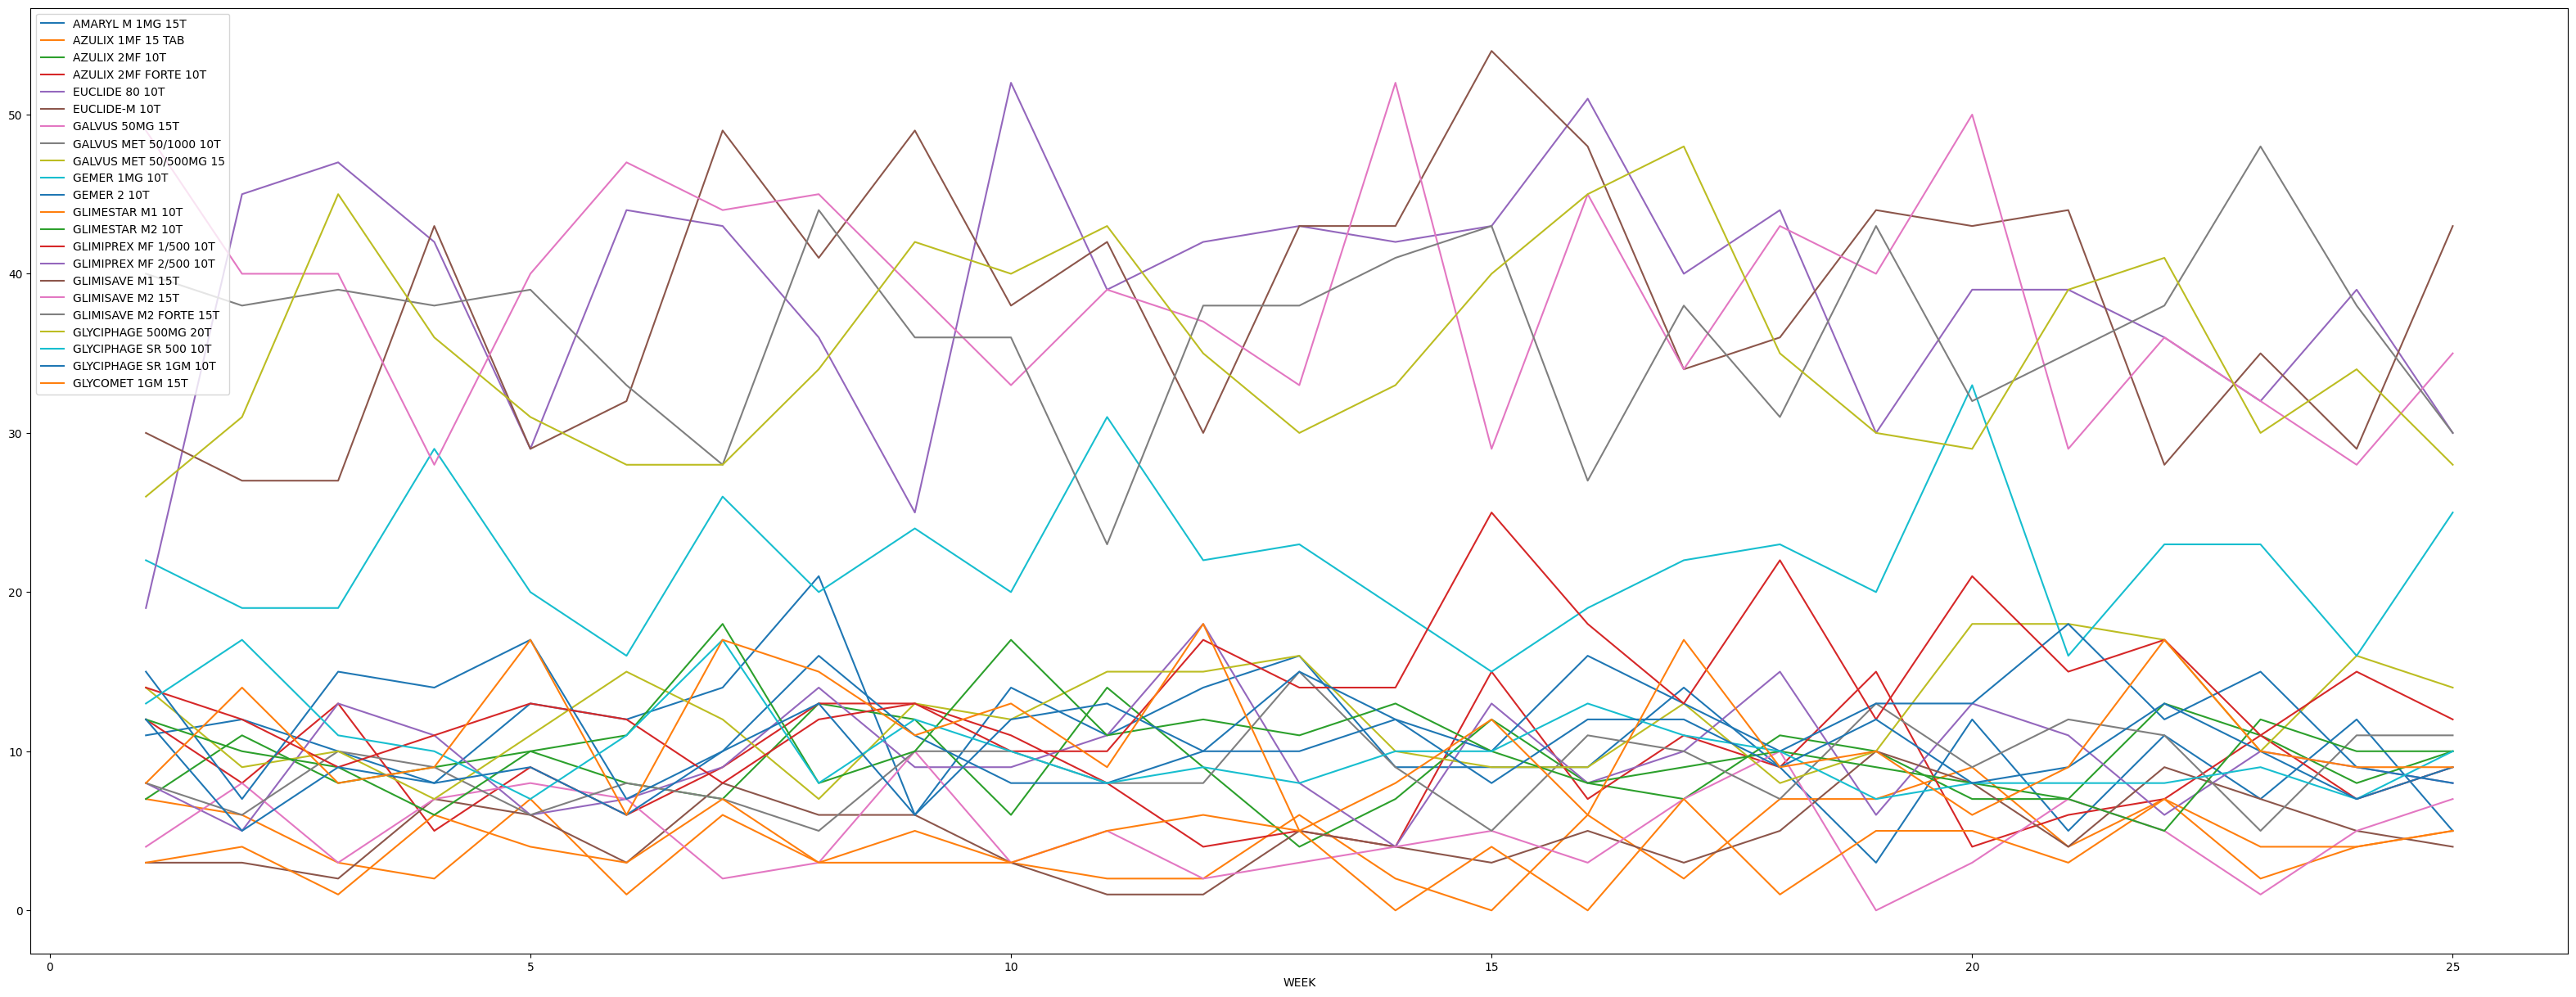

In [61]:
df.plot(figsize=(40, 15))

In [62]:
medname=list(df.columns)
print(medname)

['AMARYL M 1MG 15T', 'AZULIX 1MF 15 TAB', 'AZULIX 2MF 10T', 'AZULIX 2MF FORTE 10T', 'EUCLIDE 80 10T', 'EUCLIDE-M 10T', 'GALVUS 50MG 15T', 'GALVUS MET 50/1000 10T', 'GALVUS MET 50/500MG 15', 'GEMER 1MG 10T', 'GEMER 2 10T', 'GLIMESTAR M1 10T', 'GLIMESTAR M2 10T', 'GLIMIPREX MF 1/500 10T', 'GLIMIPREX MF 2/500 10T', 'GLIMISAVE M1 15T', 'GLIMISAVE M2 15T', 'GLIMISAVE M2 FORTE 15T', 'GLYCIPHAGE 500MG 20T', 'GLYCIPHAGE SR 500 10T', 'GLYCIPHAGE SR 1GM 10T', 'GLYCOMET 1GM 15T']


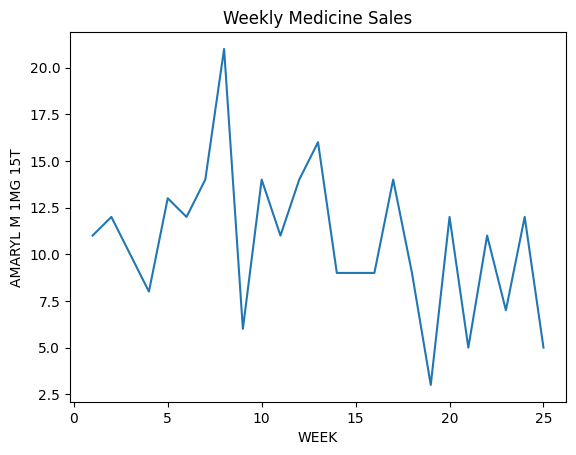

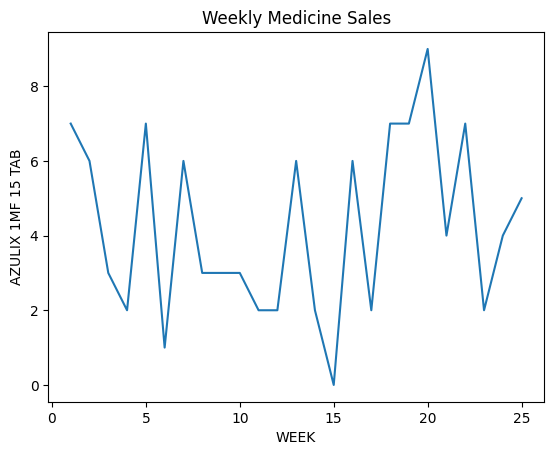

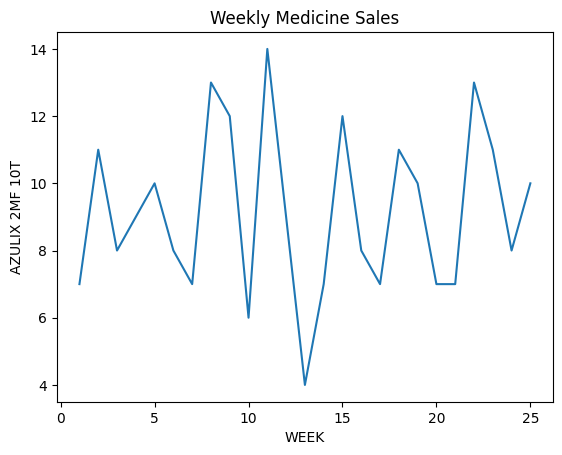

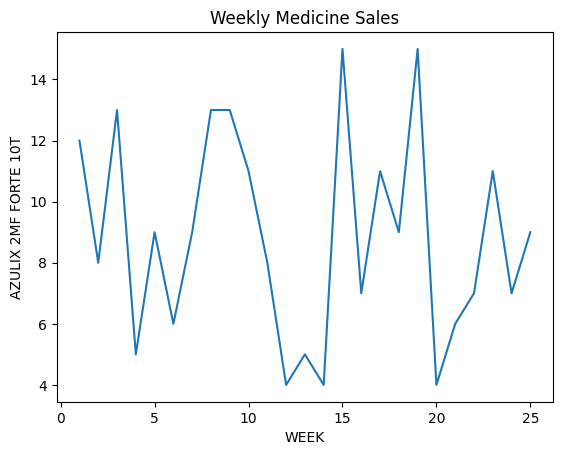

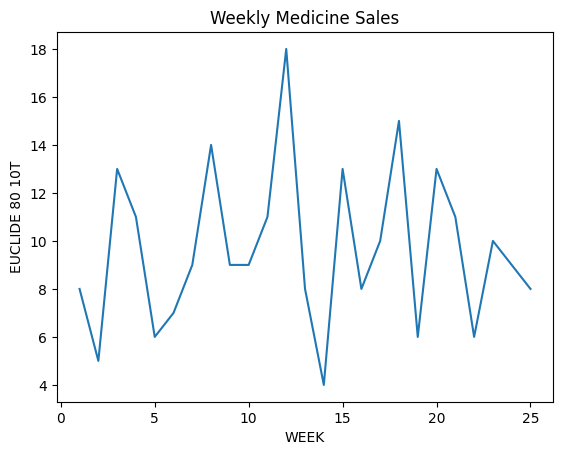

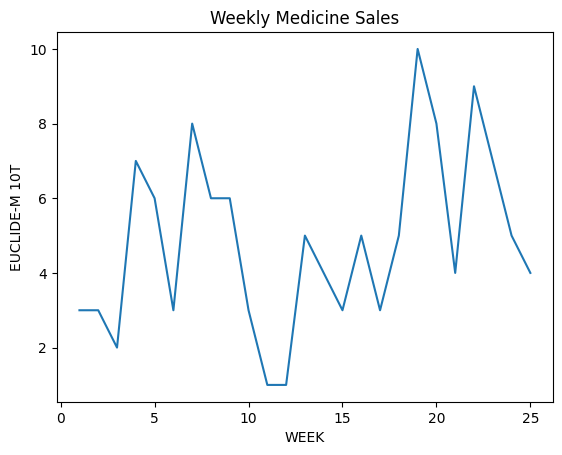

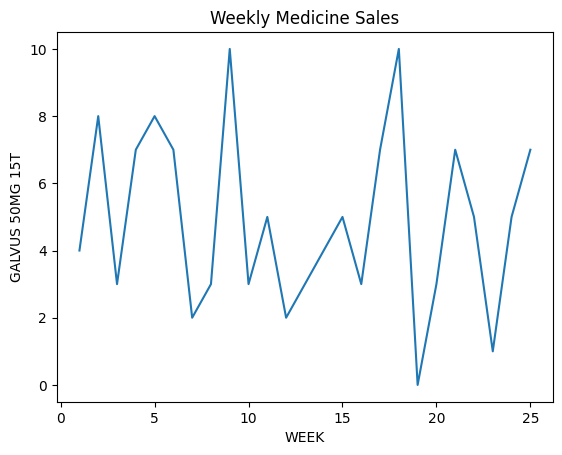

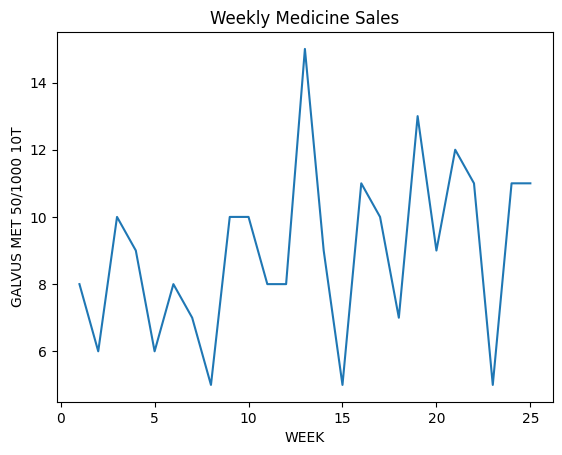

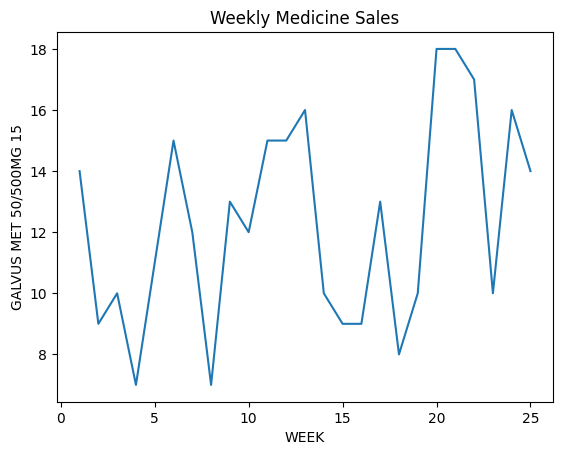

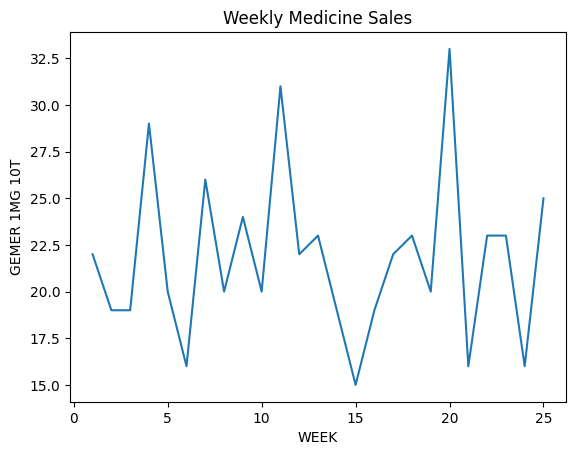

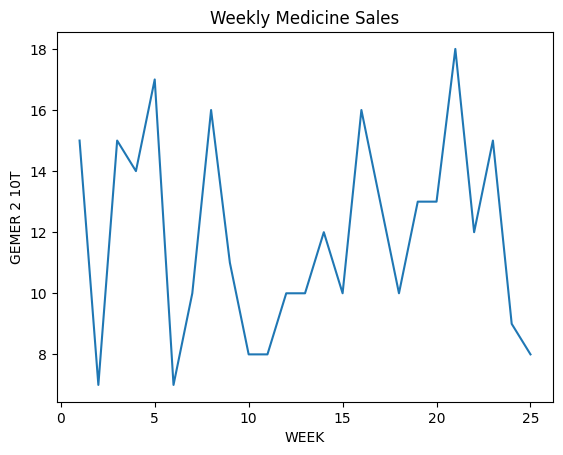

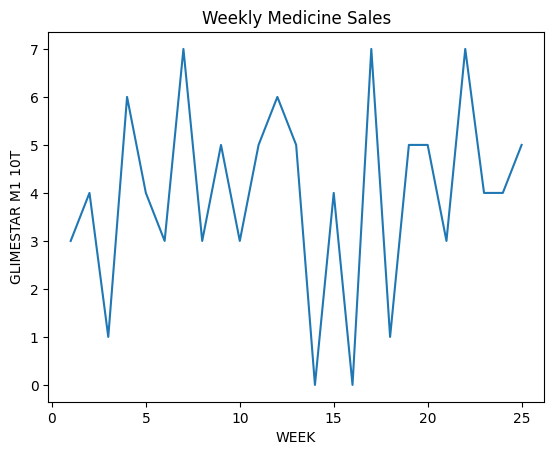

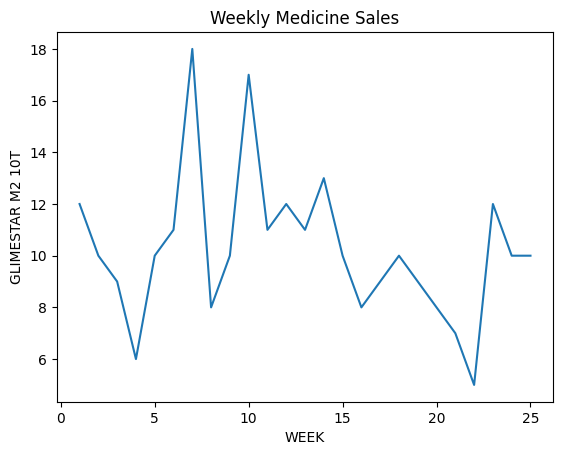

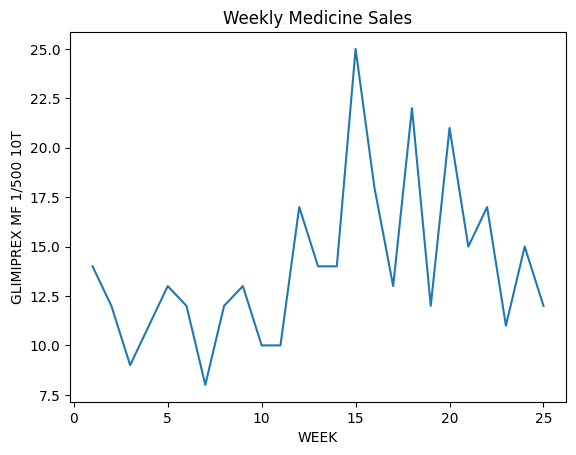

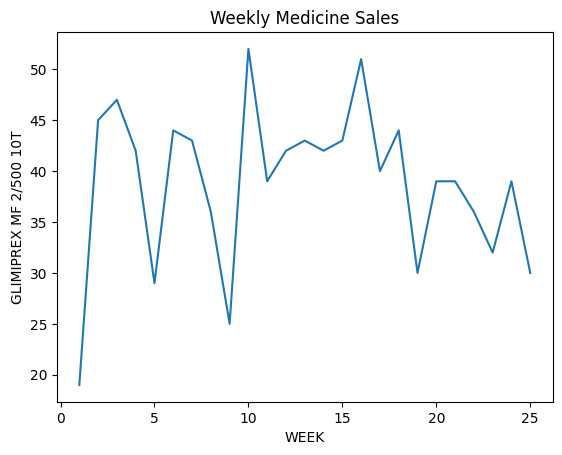

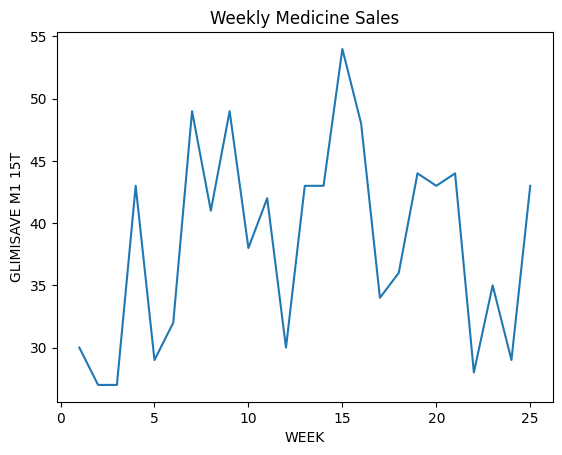

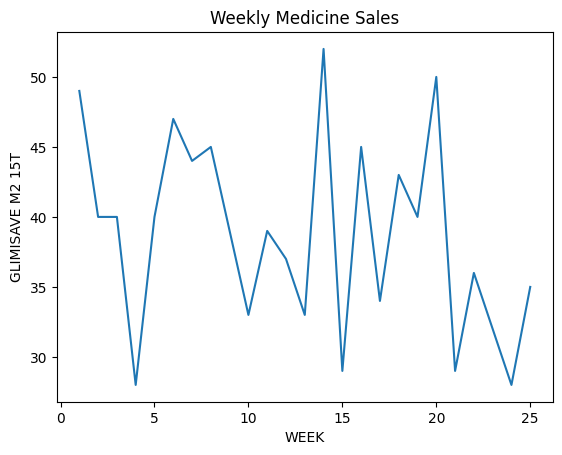

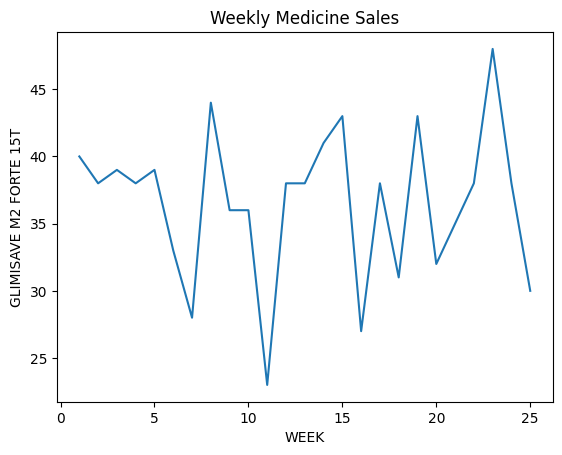

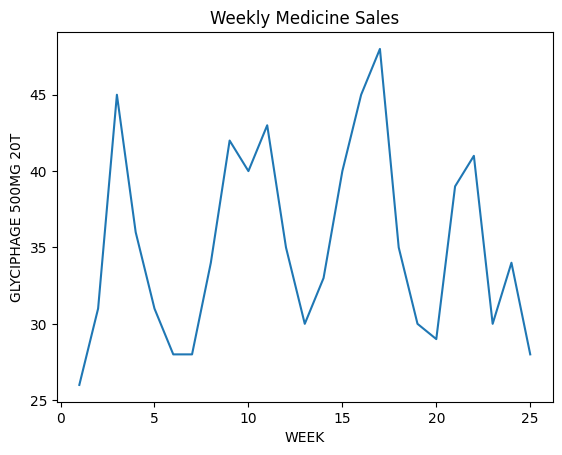

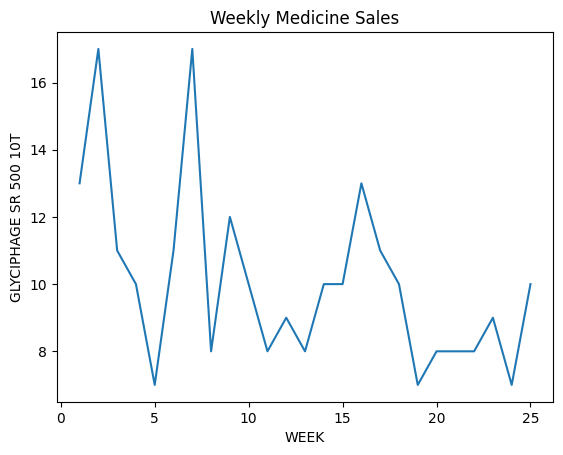

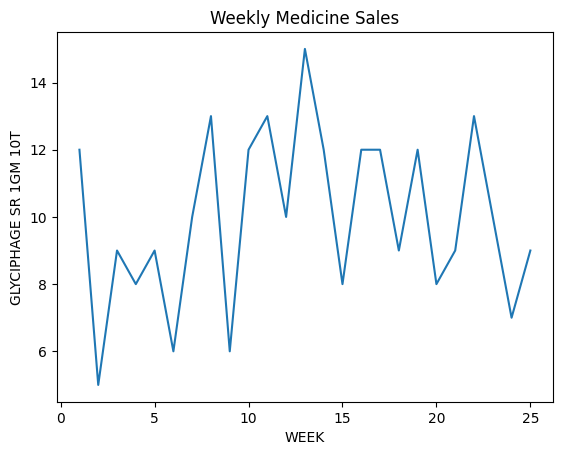

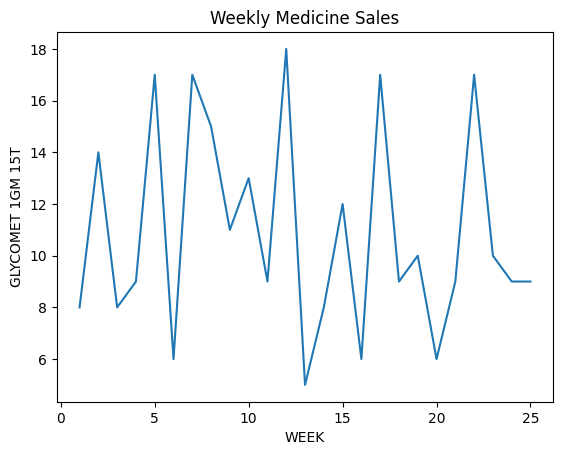

In [63]:
for col in medname:
    plt.figsize=(8, 6)
    plt.plot(df[col])
    plt.title('Weekly Medicine Sales')
    plt.xlabel('WEEK')
    plt.ylabel(col)
    plt.show()

In [64]:
from statsmodels.tsa.stattools import adfuller

for x in medname:
    dftest = adfuller(df[x], regression='ct', autolag='AIC')
    print("ADF test for "+x)
    print("-----------------------------")
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

ADF test for AMARYL M 1MG 15T
-----------------------------
Test statistic = -5.962
P-value = 0.000
Critical values :
	1%: -4.395041166087963 - The data is  stationary with 99% confidence
	5%: -3.6123930960648147 - The data is  stationary with 95% confidence
	10%: -3.243216493055556 - The data is  stationary with 90% confidence
ADF test for AZULIX 1MF 15 TAB
-----------------------------
Test statistic = -2.353
P-value = 0.405
Critical values :
	1%: -4.7284062962962965 - The data is not stationary with 99% confidence
	5%: -3.7567874814814814 - The data is not stationary with 95% confidence
	10%: -3.323498888888889 - The data is not stationary with 90% confidence
ADF test for AZULIX 2MF 10T
-----------------------------
Test statistic = -2.176
P-value = 0.503
Critical values :
	1%: -4.7284062962962965 - The data is not stationary with 99% confidence
	5%: -3.7567874814814814 - The data is not stationary with 95% confidence
	10%: -3.323498888888889 - The data is not stationary with 90% co

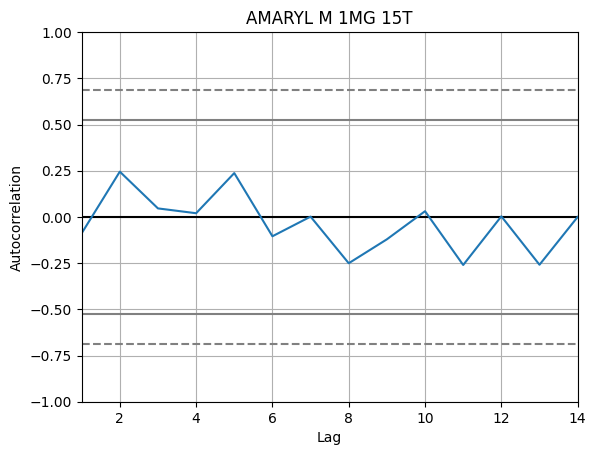

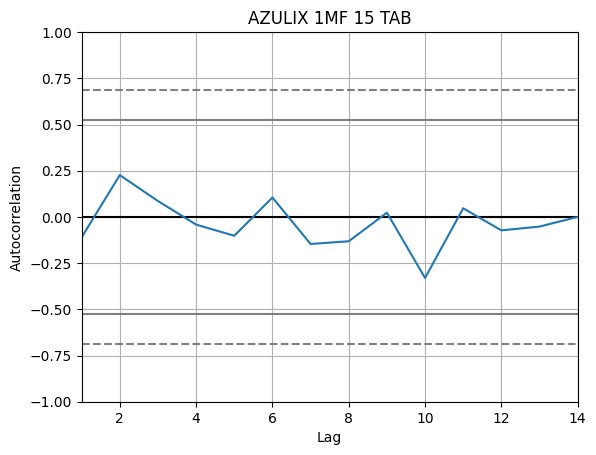

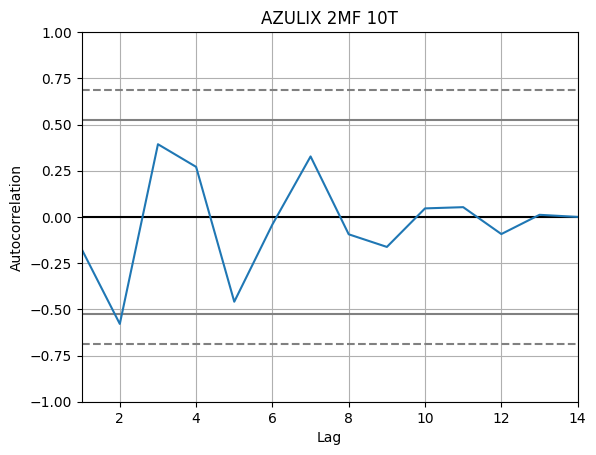

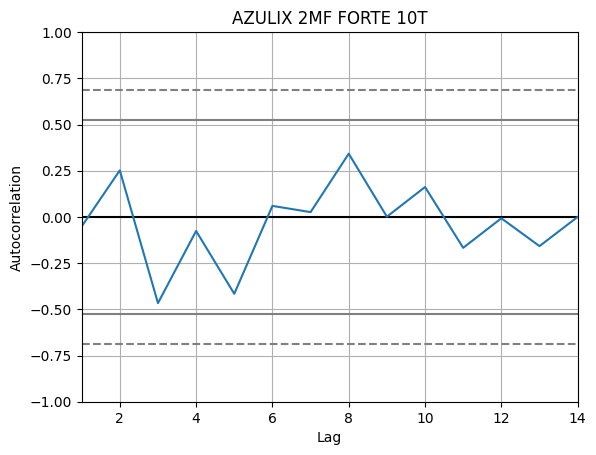

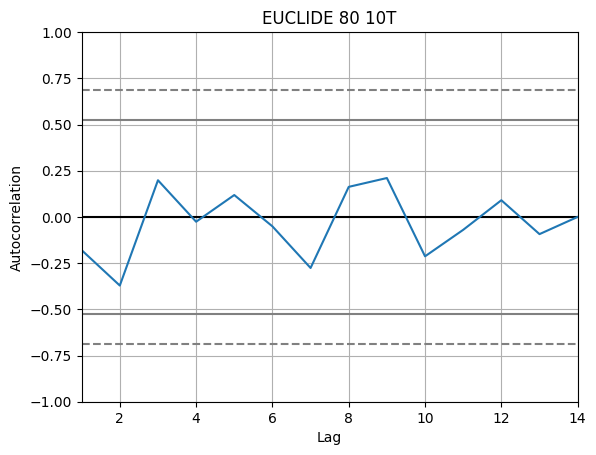

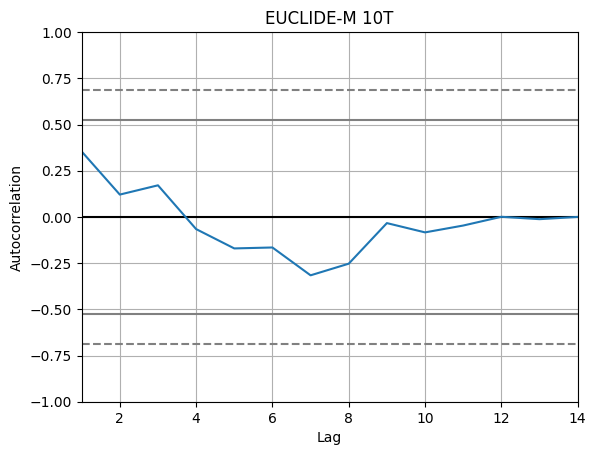

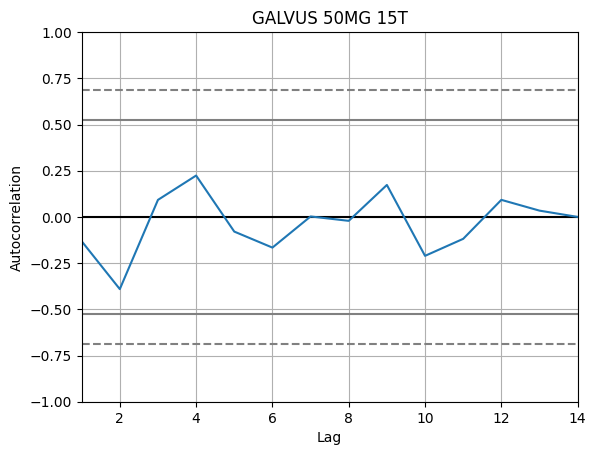

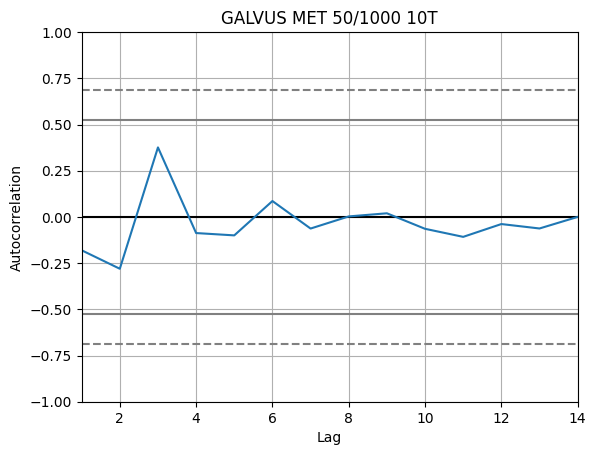

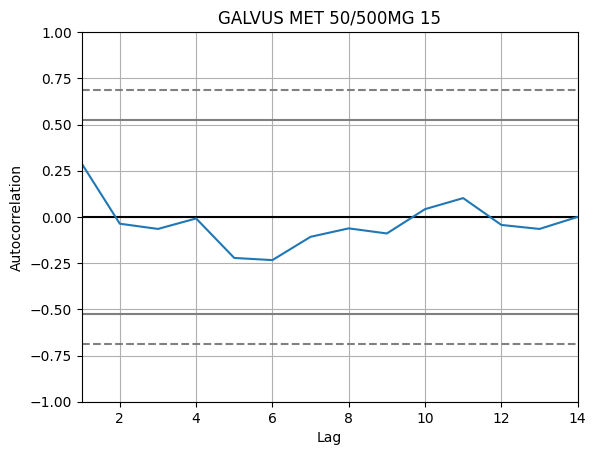

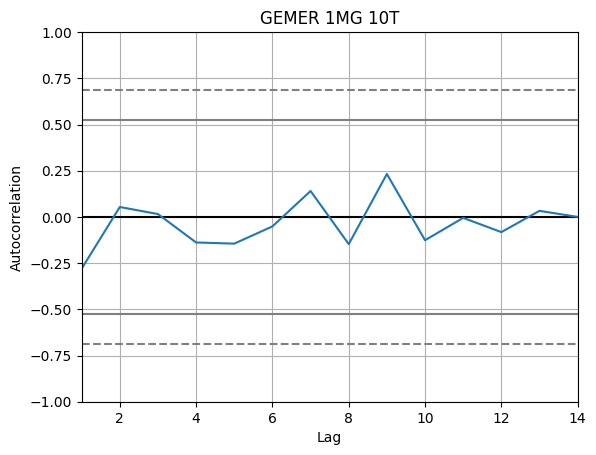

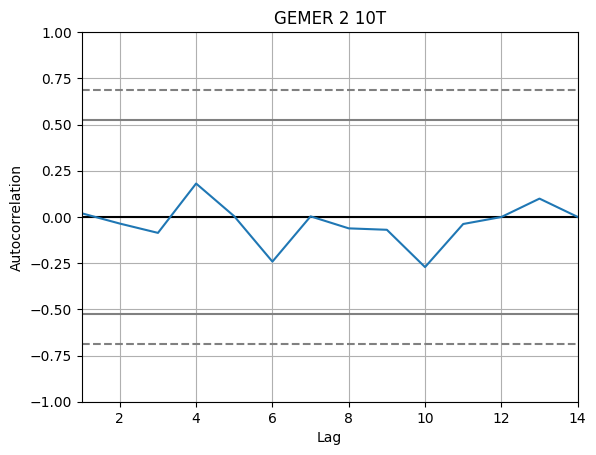

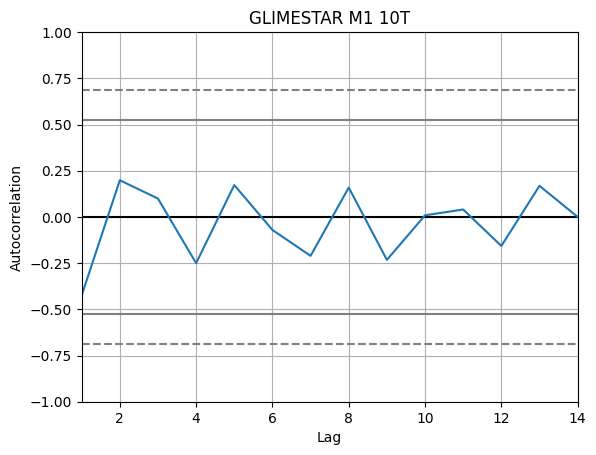

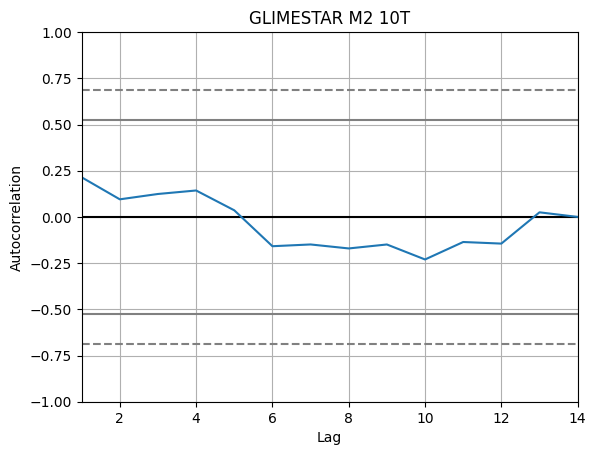

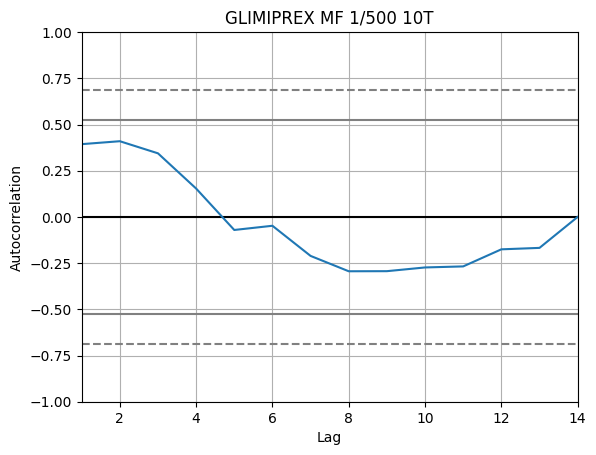

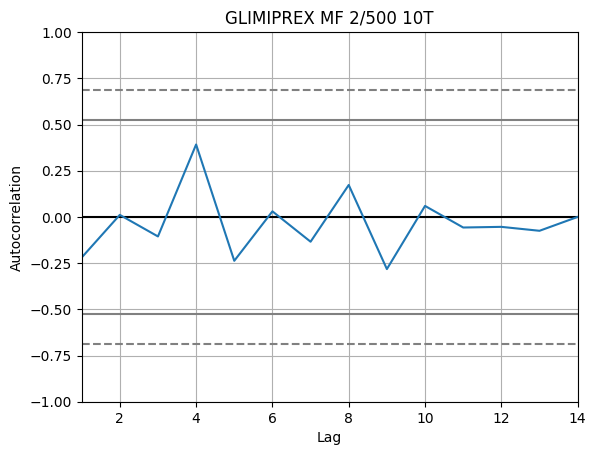

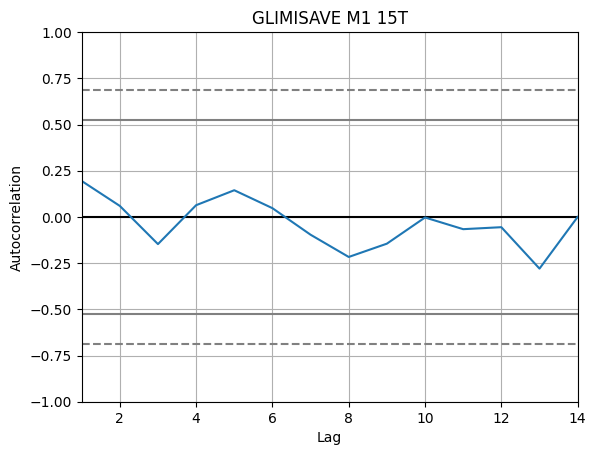

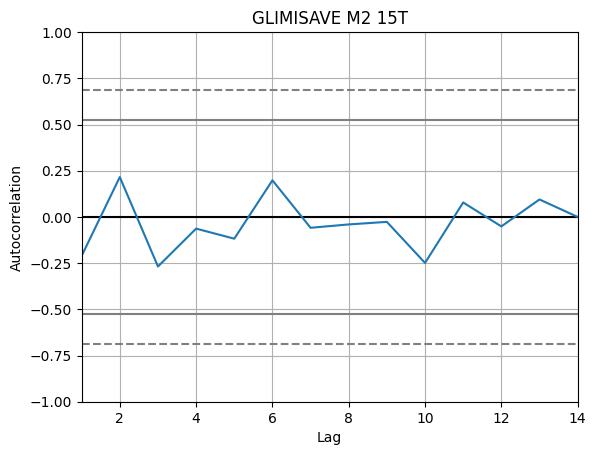

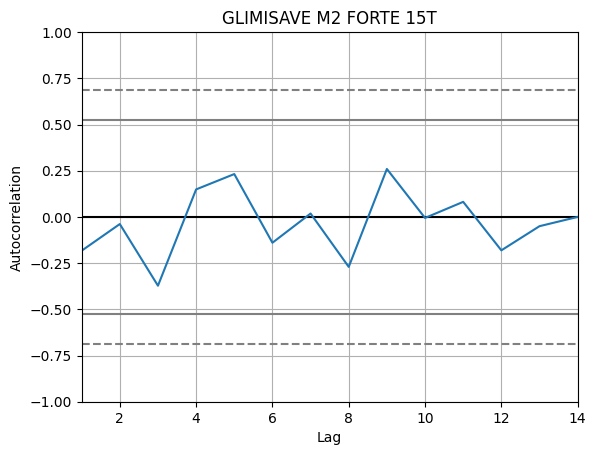

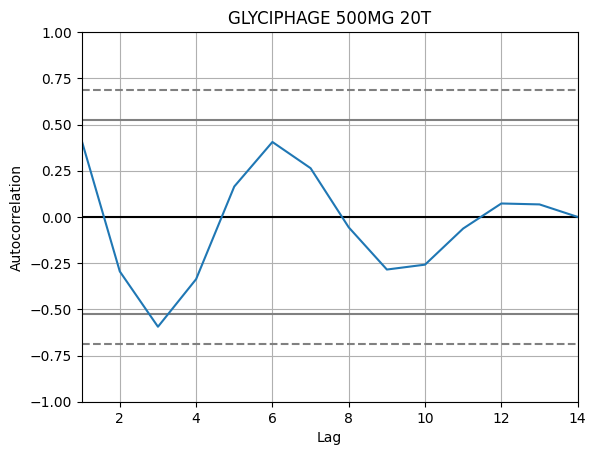

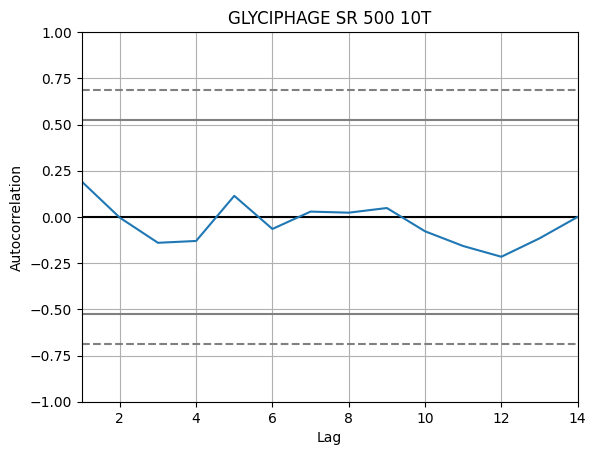

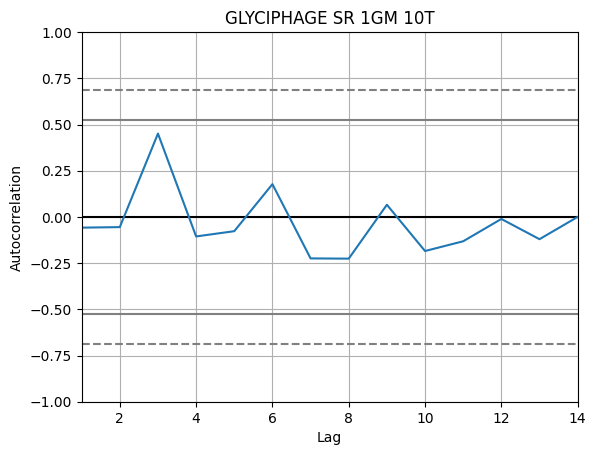

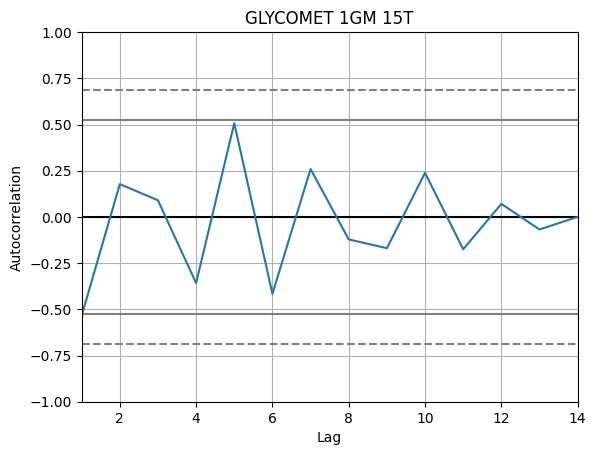

In [65]:
for x in medname:
  acf = sm.tsa.stattools.acf(df[x])
  autocorrelation_plot(acf)
  plt.title(x)
  plt.xlabel('Lag')
  plt.ylabel('Autocorrelation')
  plt.show()

In [66]:
df =pd.read_csv('/content/drive/MyDrive/BE MAJOR PROJECT/AllAlreadyStationaryData - Sheet1.csv')

In [67]:
df

WEEK  AMARYL M 1MG 15T  AZULIX 2MF 10T  AZULIX 2MF FORTE 10T  \
0      1                11               7                    12   
1      2                12              11                     8   
2      3                10               8                    13   
3      4                 8               9                     5   
4      5                13              10                     9   
5      6                12               8                     6   
6      7                14               7                     9   
7      8                21              13                    13   
8      9                 6              12                    13   
9     10                14               6                    11   
10    11                11              14                     8   
11    12                14               9                     4   
12    13                16               4                     5   
13    14                 9               7                     4   
14    15                 9              12                    15   
15    16                 9               8                     7   
16    17                14               7                    11   
17    18                 9              11                     9   
18    19                 3              10                    15   
19    20                12               7                     4   
20    21                 5               7                     6   
21    22                11              13                     7   
22    23                 7              11                    11   
23    24                12               8                     7   
24    25                 5              10                     9   

    EUCLIDE 80 10T  GALVUS MET 50/1000 10T  GALVUS MET 50/500MG 15  \
0                8                       8                      14   
1                5                       6                       9   
2               13                      10                      10   
3               11                       9                       7   
4                6                       6                      11   
5                7                       8                      15   
6                9                       7                      12   
7               14                       5                       7   
8                9                      10                      13   
9                9                      10                      12   
10              11                       8                      15   
11              18                       8                      15   
12               8                      15                      16   
13               4                       9                      10   
14              13                       5                       9   
15               8                      11                       9   
16              10                      10                      13   
17              15                       7                       8   
18               6                      13                      10   
19              13                       9                      18   
20              11                      12                      18   
21               6                      11                      17   
22              10                       5                      10   
23               9                      11                      16   
24               8                      11                      14   

    GEMER 1MG 10T  GEMER 2 10T  GLIMESTAR M1 10T  GLIMESTAR M2 10T  \
0              22           15                 3                12   
1              19            7                 4                10   
2              19           15                 1                 9   
3              29           14                 6                 6   
4              20           17                 4                

1/1 [==============================] - 0s 25ms/step
Train R-squared: 0.65
Test R-squared: 0.32
Predicted values for AMARYL M 1MG 15T for the next 10 weeks:
Week 26: -26.88
Week 27: -19.31
Week 28: 0.87
Week 29: 10.42
Week 30: -15.02
Week 31: -13.19
Week 32: 4.83
Week 33: 14.24
Week 34: -14.51
Week 35: -16.32


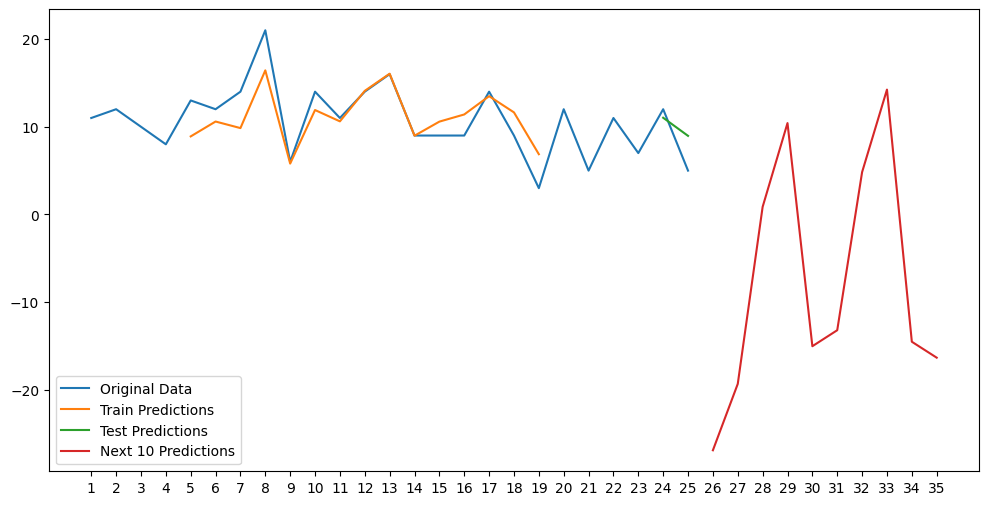

1/1 [==============================] - 0s 21ms/step
Train R-squared: 0.95
Test R-squared: -4.99
Predicted values for AZULIX 2MF 10T for the next 10 weeks:
Week 26: 2.04
Week 27: 5.29
Week 28: -1.26
Week 29: -13.65
Week 30: -5.06
Week 31: 6.40
Week 32: 10.72
Week 33: 0.39
Week 34: 1.05
Week 35: 0.93


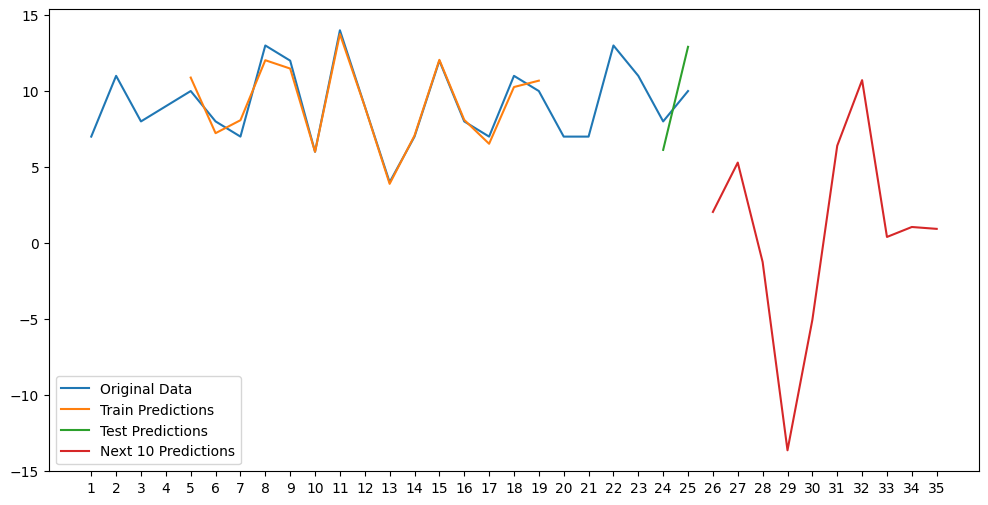

1/1 [==============================] - 0s 23ms/step
Train R-squared: 1.00
Test R-squared: -17.14
Predicted values for AZULIX 2MF FORTE 10T for the next 10 weeks:
Week 26: 39.83
Week 27: 2.47
Week 28: 14.70
Week 29: 3.61
Week 30: 22.84
Week 31: 3.88
Week 32: 18.39
Week 33: 5.27
Week 34: 33.20
Week 35: 2.71


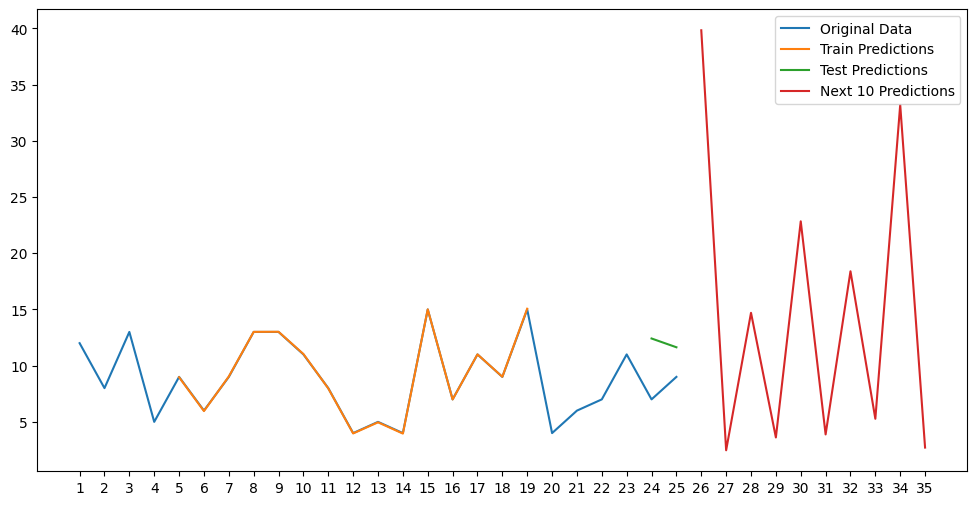

1/1 [==============================] - 0s 27ms/step
Train R-squared: 0.99
Test R-squared: -222.92
Predicted values for EUCLIDE 80 10T for the next 10 weeks:
Week 26: -27.73
Week 27: 11.63
Week 28: 5.54
Week 29: 7.28
Week 30: 34.15
Week 31: -26.50
Week 32: -11.42
Week 33: 4.73
Week 34: 6.14
Week 35: 24.96


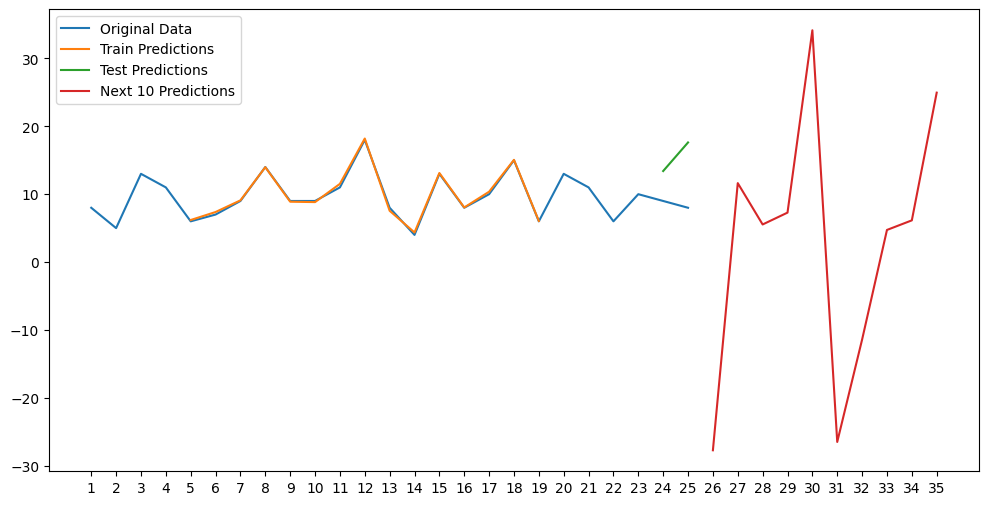

1/1 [==============================] - 0s 37ms/step
Train R-squared: 0.65
Test R-squared: 0.00
Predicted values for GALVUS MET 50/1000 10T for the next 10 weeks:
Week 26: 50.92
Week 27: 56.52
Week 28: 47.08
Week 29: 71.24
Week 30: 5.94
Week 31: 65.35
Week 32: 5.66
Week 33: -19.67
Week 34: 5.65
Week 35: -42.89


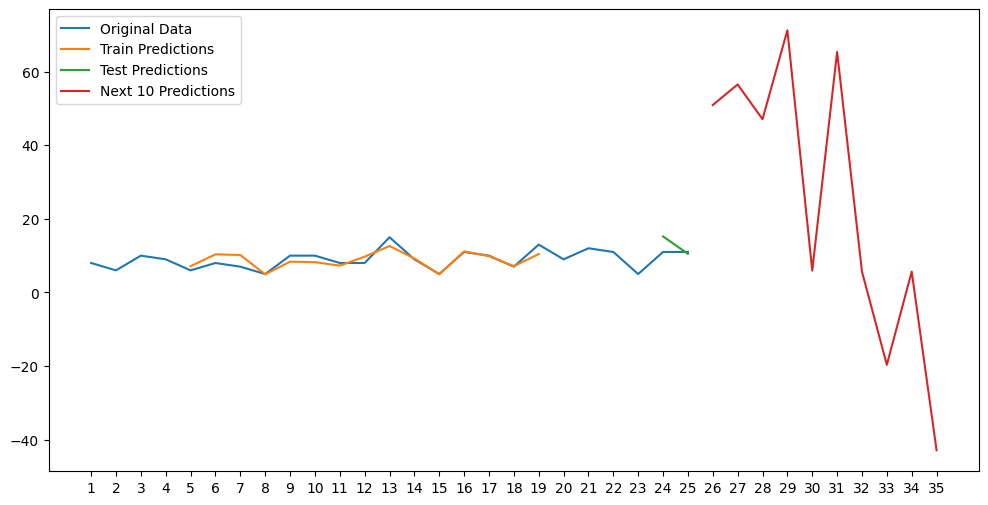

1/1 [==============================] - 0s 33ms/step
Train R-squared: 0.99
Test R-squared: -48.95
Predicted values for GALVUS MET 50/500MG 15 for the next 10 weeks:
Week 26: 41.99
Week 27: -10.26
Week 28: -8.02
Week 29: 7.50
Week 30: 27.77
Week 31: -24.62
Week 32: 18.34
Week 33: 104.13
Week 34: 57.99
Week 35: 26.88


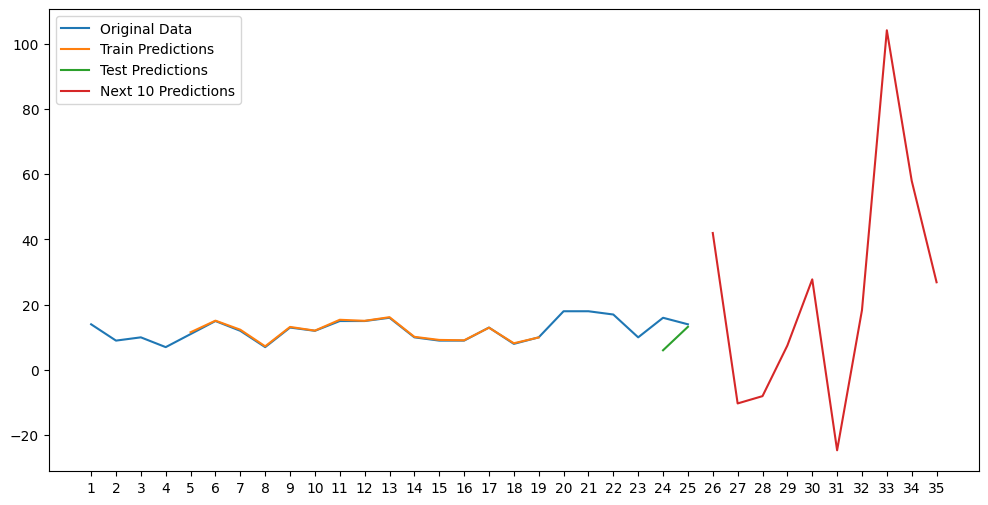

1/1 [==============================] - 0s 20ms/step
Train R-squared: 1.00
Test R-squared: -2.00
Predicted values for GEMER 1MG 10T for the next 10 weeks:
Week 26: 23.75
Week 27: -79.33
Week 28: -128.69
Week 29: -141.67
Week 30: -127.33
Week 31: 33.32
Week 32: 16.89
Week 33: 12.60
Week 34: 4.60
Week 35: -71.41


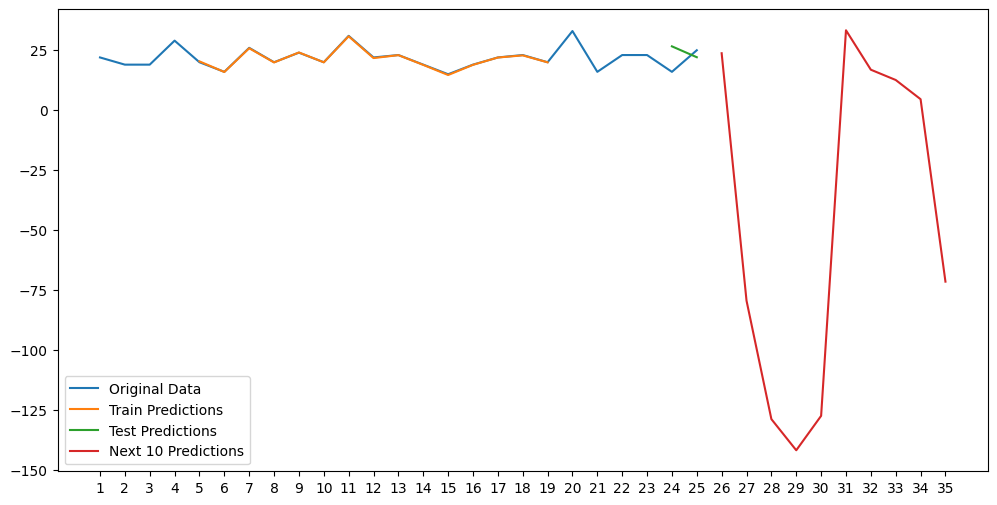

1/1 [==============================] - 0s 29ms/step
Train R-squared: 1.00
Test R-squared: -1428.32
Predicted values for GEMER 2 10T for the next 10 weeks:
Week 26: -13.59
Week 27: -20.92
Week 28: -26.72
Week 29: 4.03
Week 30: 0.38
Week 31: 55.67
Week 32: 4.26
Week 33: -2.66
Week 34: -23.28
Week 35: 2.27


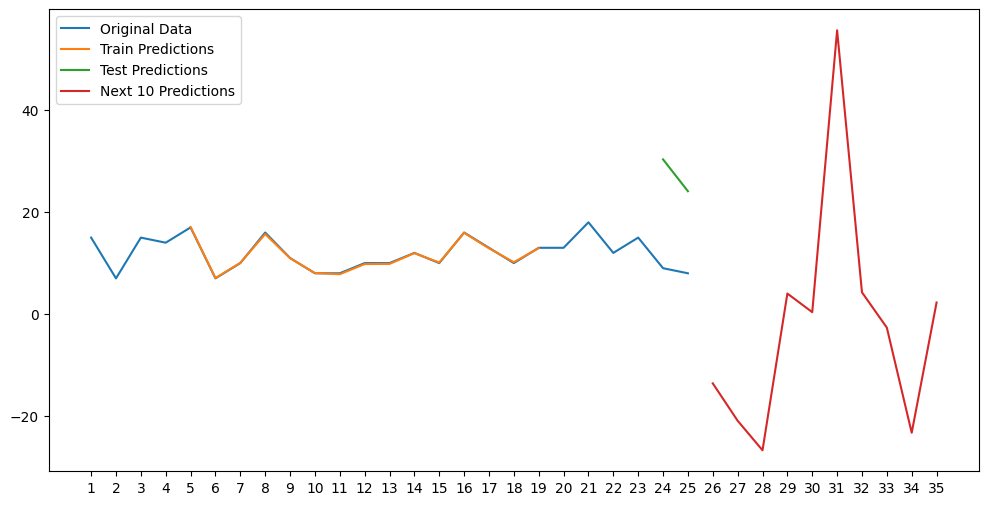

1/1 [==============================] - 0s 21ms/step
Train R-squared: 0.97
Test R-squared: -8.56
Predicted values for GLIMESTAR M1 10T for the next 10 weeks:
Week 26: -14.96
Week 27: -47.47
Week 28: -6.80
Week 29: -2.33
Week 30: -3.55
Week 31: -19.69
Week 32: 60.34
Week 33: -1.09
Week 34: -12.76
Week 35: 51.17


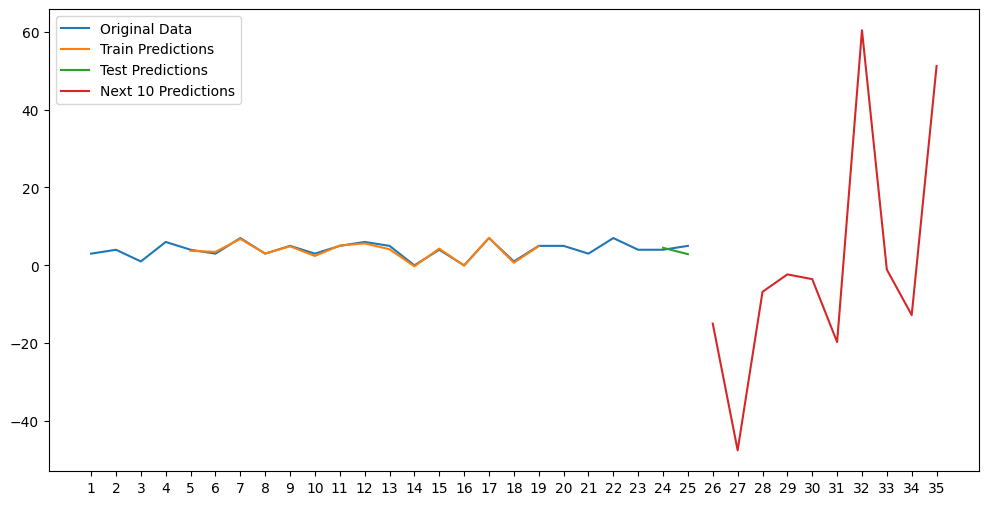

1/1 [==============================] - 0s 24ms/step
Train R-squared: 0.98
Test R-squared: 0.00
Predicted values for GLIMESTAR M2 10T for the next 10 weeks:
Week 26: 16.43
Week 27: 47.03
Week 28: 64.93
Week 29: 26.17
Week 30: -2.13
Week 31: 80.32
Week 32: 32.41
Week 33: 55.52
Week 34: 42.02
Week 35: 24.74


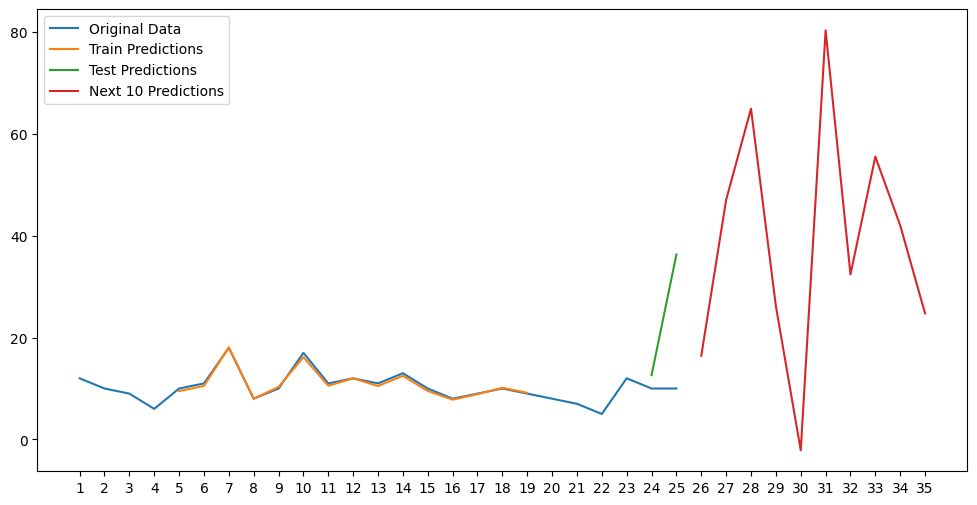

1/1 [==============================] - 0s 22ms/step
Train R-squared: 0.94
Test R-squared: -17.52
Predicted values for GLIMIPREX MF 1/500 10T for the next 10 weeks:
Week 26: 8.72
Week 27: 8.73
Week 28: 8.79
Week 29: 8.81
Week 30: 0.03
Week 31: -1.67
Week 32: -8.35
Week 33: -13.51
Week 34: -21.49
Week 35: -15.20


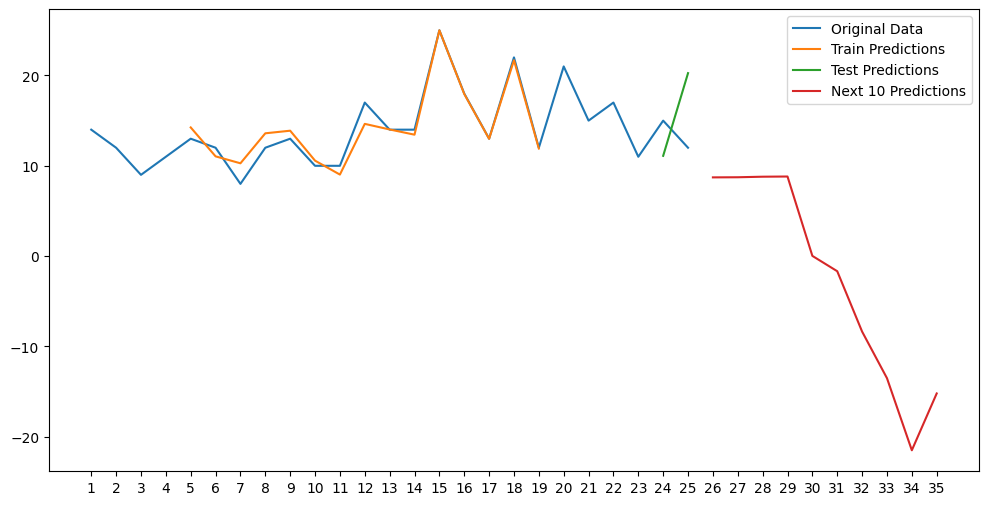

1/1 [==============================] - 0s 31ms/step
Train R-squared: 0.64
Test R-squared: -4.48
Predicted values for GLIMIPREX MF 2/500 10T for the next 10 weeks:
Week 26: 23.29
Week 27: 100.62
Week 28: 155.67
Week 29: 132.33
Week 30: 34.56
Week 31: 29.19
Week 32: 115.86
Week 33: 24.24
Week 34: -37.74
Week 35: -47.50


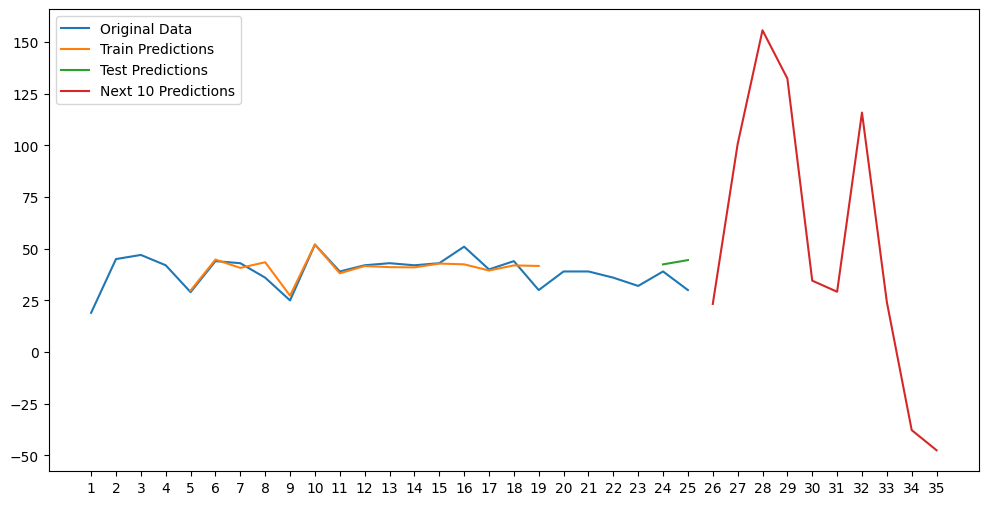

1/1 [==============================] - 0s 22ms/step
Train R-squared: 1.00
Test R-squared: -1.15
Predicted values for GLIMISAVE M1 15T for the next 10 weeks:
Week 26: -31.98
Week 27: 37.52
Week 28: 53.78
Week 29: 186.05
Week 30: 159.52
Week 31: 29.80
Week 32: 30.88
Week 33: 52.82
Week 34: 142.29
Week 35: 71.95


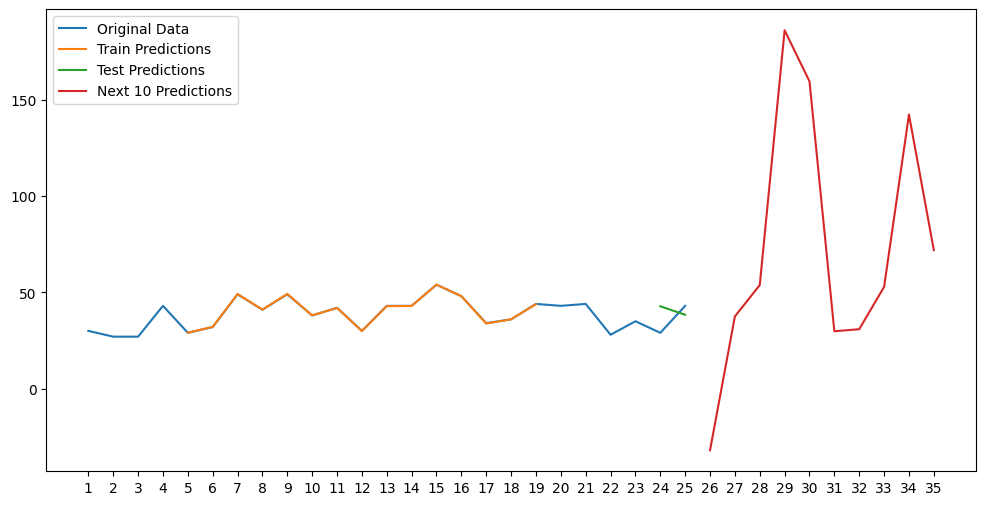

1/1 [==============================] - 0s 22ms/step
Train R-squared: 0.86
Test R-squared: -160.66
Predicted values for GLIMISAVE M2 15T for the next 10 weeks:
Week 26: 69.17
Week 27: 64.37
Week 28: 63.51
Week 29: 168.31
Week 30: 36.14
Week 31: 102.96
Week 32: -39.77
Week 33: 105.72
Week 34: 3.71
Week 35: 146.13


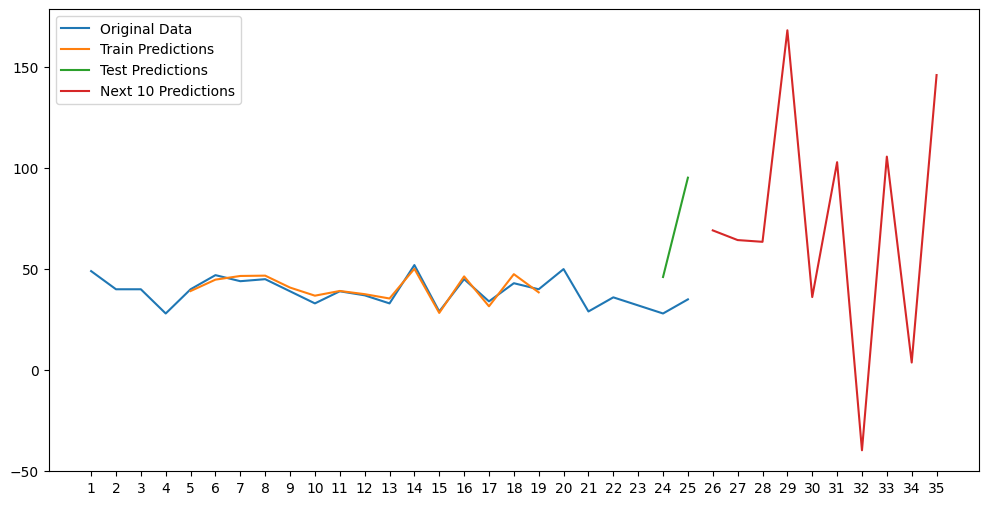

1/1 [==============================] - 0s 22ms/step
Train R-squared: 0.80
Test R-squared: -2.28
Predicted values for GLIMISAVE M2 FORTE 15T for the next 10 weeks:
Week 26: -1.54
Week 27: 26.75
Week 28: 30.46
Week 29: 71.06
Week 30: 158.03
Week 31: 53.23
Week 32: 24.76
Week 33: -78.53
Week 34: 28.13
Week 35: 78.43


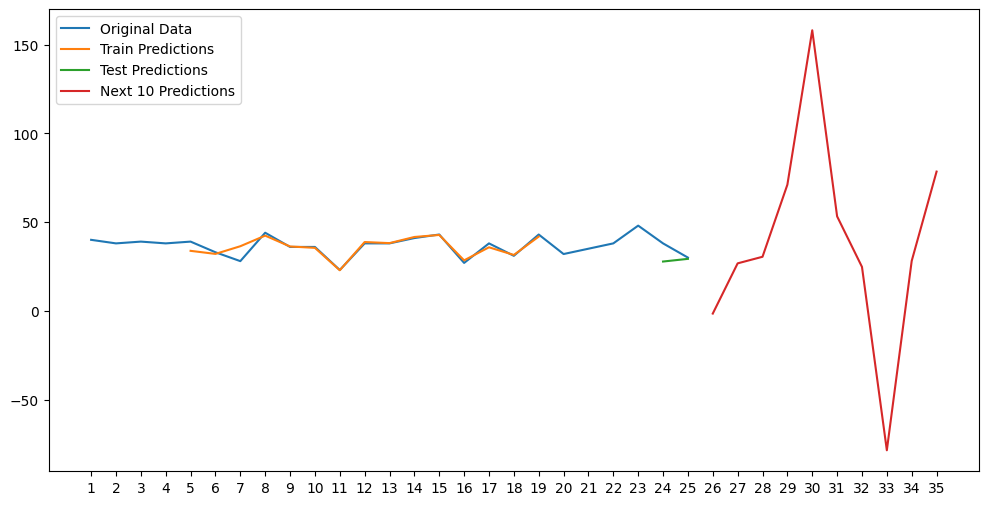

1/1 [==============================] - 0s 27ms/step
Train R-squared: 0.97
Test R-squared: -6.10
Predicted values for GLYCIPHAGE 500MG 20T for the next 10 weeks:
Week 26: 26.24
Week 27: 26.99
Week 28: 24.14
Week 29: -40.80
Week 30: -7.34
Week 31: 45.83
Week 32: 14.61
Week 33: 14.24
Week 34: 32.64
Week 35: 17.78


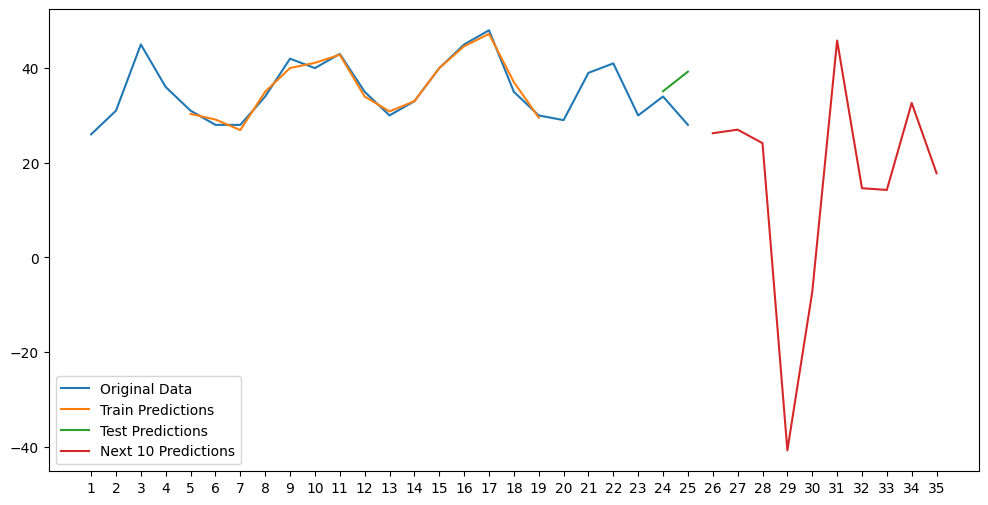

In [68]:
predicted_values = []
# extract the sales data
products = df.columns[1:]
for product in products:
    y = df[product].values

    # scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    y = scaler.fit_transform(y.reshape(-1, 1))

    # split the data into training and testing sets
    train_size = int(len(y) * 0.79)
    train, test = y[0:train_size,:], y[train_size:len(y),:]

    # function to create dataset for LSTM
    def create_dataset(dataset, look_back=3):
        X, Y = [], []
        for i in range(len(dataset)-look_back):
            X.append(dataset[i:(i+look_back), 0])
            Y.append(dataset[i + look_back, 0])
        return np.array(X), np.array(Y)

    # create the dataset for training and testing the LSTM
    look_back = 4
    X_train, y_train = create_dataset(train, look_back)
    X_test, y_test = create_dataset(test, look_back)

    # reshape the data for LSTM
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

    # create the LSTM model
    model = Sequential()
    model.add(LSTM(64,return_sequences=True, input_shape=(1, look_back)))
    model.add(LSTM(32))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # train the LSTM model
    model.fit(X_train, y_train, epochs=1000, batch_size=1, verbose=0)

    # make predictions with the LSTM model
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # invert the scaling
    train_predict = scaler.inverse_transform(train_predict)
    y_train = scaler.inverse_transform([y_train])
    test_predict = scaler.inverse_transform(test_predict)
    y_test = scaler.inverse_transform([y_test])

    # make predictions for the next 10 weeks
    last_weeks = df.tail(look_back)[product].values.reshape(-1, 1)
    next_weeks = []
    for i in range(10):
        next_week = model.predict(last_weeks.reshape(1, 1, look_back))
        next_weeks.append(next_week[0][0])
        last_weeks = np.append(last_weeks, next_week, axis=0)[1:]

    # invert the scaling for the next 10 weeks
    next_weeks = scaler.inverse_transform(np.array(next_weeks).reshape(-1, 1))

    train_r2 = r2_score(y_train[0], train_predict.flatten())
    test_r2 = r2_score(y_test[0], test_predict.flatten())
    print("Train R-squared: {:.2f}".format(train_r2))
    print("Test R-squared: {:.2f}".format(test_r2))

    # print the predicted values for the next 10 weeks
    print(f"Predicted values for {product} for the next 10 weeks:")
    for i in range(10):
        predicted_values.append(next_weeks[i][0])
        print(f"Week {i+26}: {next_weeks[i][0]:.2f}")
    if i == 35:
        print(f"Predicted values for {product} for the next 10 weeks: {predicted_values}")
        predicted_values.clear() # clear the list for next loop

    # plot the original data and the predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(df['WEEK'], scaler.inverse_transform(y), label='Original Data')
    plt.plot(df['WEEK'][look_back:train_size], train_predict, label='Train Predictions')
    plt.plot(df['WEEK'][look_back+train_size:], test_predict, label='Test Predictions')
    plt.plot(range(26, 36), next_weeks, label='Next 10 Predictions')
    plt.xticks(list(range(1, 36)))
    plt.legend()
    plt.show()

In [77]:
medicines = {
    'AMARYL M 1MG 15T': {'p': 4, 'd': 0, 'q': 4},
    'AZULIX 2MF 10T': {'p': 5, 'd': 0, 'q': 4},
    'AZULIX 2MF FORTE 10T': {'p': 5, 'd': 0, 'q': 4},
    'EUCLIDE 80 10T': {'p': 5, 'd': 0, 'q': 3},
    'GALVUS MET 50/1000 10T': {'p': 5, 'd': 0, 'q': 4},
    'GALVUS MET 50/500MG 15': {'p': 5, 'd': 0, 'q': 4},
    'GEMER 1MG 10T': {'p': 5, 'd': 0, 'q': 3},
    'GEMER 2 10T': {'p': 5, 'd': 0, 'q': 3},
    'GLIMESTAR M1 10T': {'p': 5, 'd': 0, 'q': 4},
    'GLIMESTAR M2 10T': {'p': 5, 'd': 0, 'q': 2},
    'GLIMIPREX MF 1/500 10T': {'p': 5, 'd': 0, 'q': 2},
    'GLIMIPREX MF 2/500 10T': {'p': 5, 'd': 0, 'q': 4},
    'GLIMISAVE M1 15T': {'p': 4, 'd': 0, 'q': 4},
    'GLIMISAVE M2 15T': {'p': 5, 'd': 0, 'q': 2},
    'GLIMISAVE M2 FORTE 15T': {'p': 5, 'd': 0, 'q': 4},
    'GLYCIPHAGE 500MG 20T': {'p': 5, 'd': 0, 'q': 4}
    }

Forecasting for AMARYL M 1MG 15T with p=4, d=0, q=4...
Forecasted values:
20     8.378500
21    10.441860
22     9.997951
23     8.674017
24    12.094008
25     8.797344
26    12.303423
27    10.625736
28    10.759609
29    12.465256
30     9.439291
31    12.646083
32     9.809071
33    11.133043
34    11.352015
35     9.517751
Name: predicted_mean, dtype: float64
R2 score for training set: 0.204
R2 score for test set: -0.866


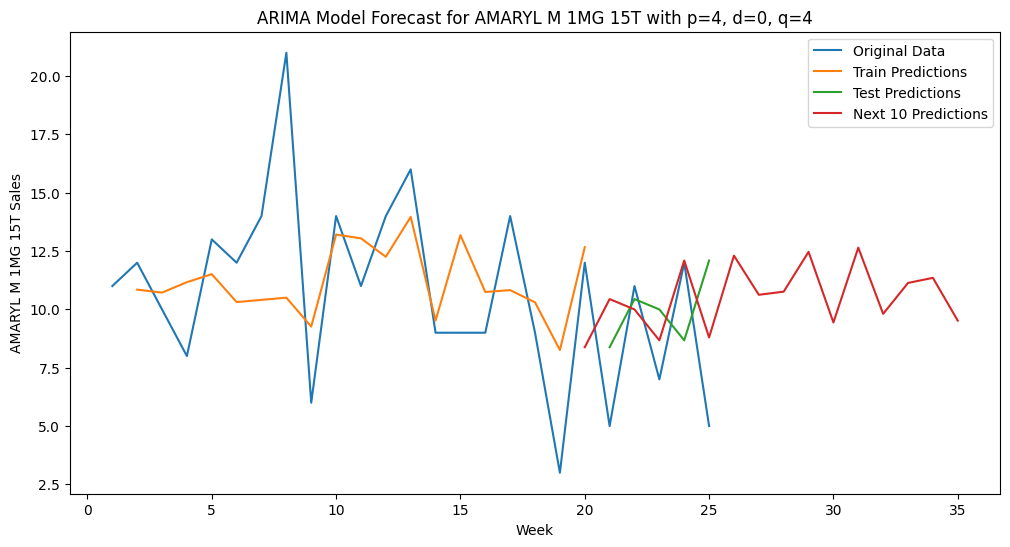

Forecasting for AZULIX 2MF 10T with p=5, d=0, q=4...
Forecasted values:
20    11.630947
21    10.467427
22     6.559175
23     9.982632
24    11.051618
25     6.579836
26     8.509671
27    11.587433
28     7.567493
29     7.462957
30    11.691820
31     8.937318
32     6.744525
33    11.078881
34    10.209637
35     6.469196
Name: predicted_mean, dtype: float64
R2 score for training set: 0.582
R2 score for test set: -1.308


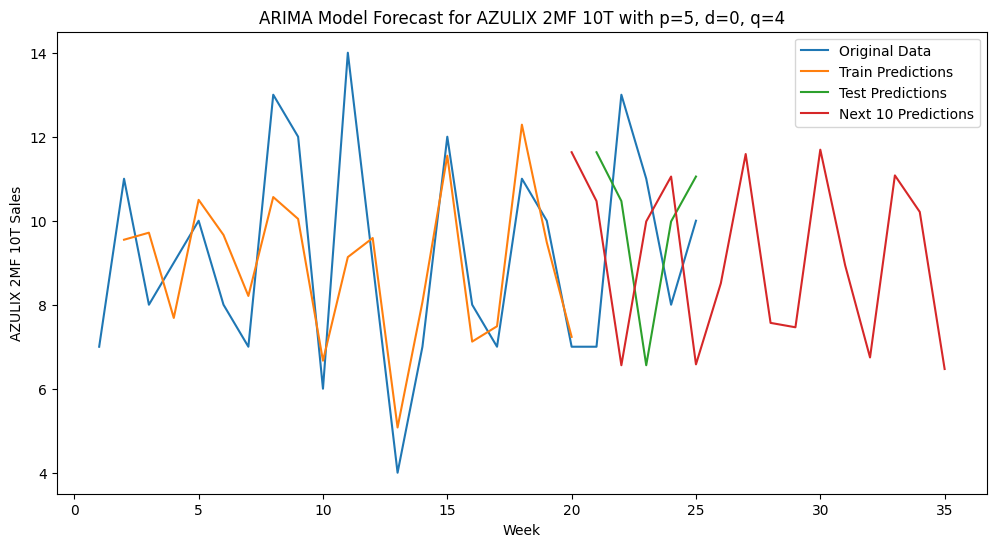

Forecasting for AZULIX 2MF FORTE 10T with p=5, d=0, q=4...
Forecasted values:
20     9.085877
21     6.561744
22    10.666299
23     5.445835
24    12.512267
25     8.480158
26     9.857827
27     7.516348
28    10.759069
29     6.363135
30     9.391818
31     8.505151
32     9.745208
33     7.733146
34    10.461286
35     8.289627
Name: predicted_mean, dtype: float64
R2 score for training set: 0.578
R2 score for test set: -0.536


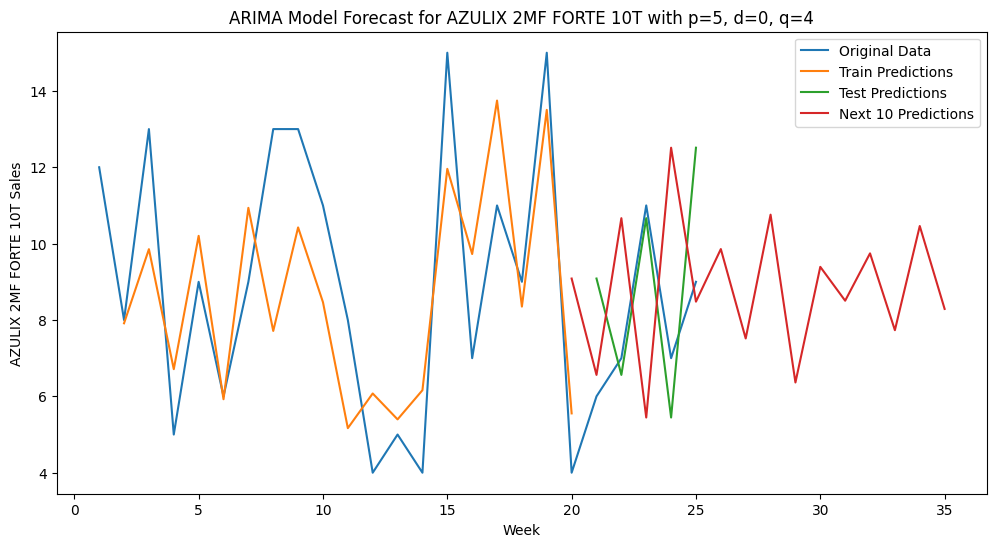

Forecasting for EUCLIDE 80 10T with p=5, d=0, q=3...
Forecasted values:
20     9.944035
21     7.279893
22    11.699374
23     8.527152
24    10.566971
25     9.824882
26     9.265948
27    11.005090
28     8.828371
29    10.748642
30     9.644503
31     9.763679
32    10.533095
33     9.237217
34    10.615905
35     9.573688
Name: predicted_mean, dtype: float64
R2 score for training set: 0.336
R2 score for test set: 0.159


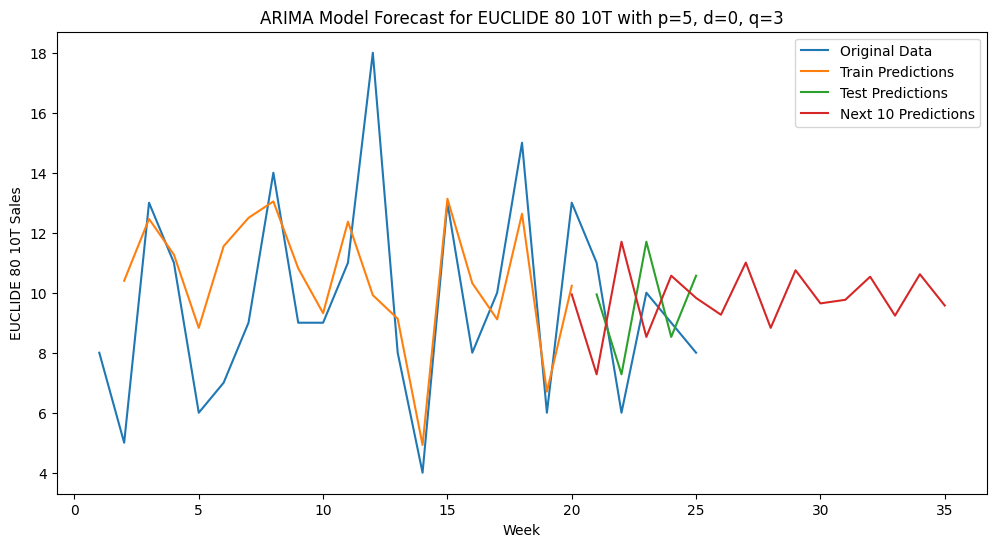

Forecasting for GALVUS MET 50/1000 10T with p=5, d=0, q=4...
Forecasted values:
20     5.775784
21     9.633552
22    10.479556
23     6.218351
24     8.505691
25    11.121606
26     6.808775
27     7.511286
28    11.202479
29     7.813538
30     6.606409
31    10.950831
32     8.834317
33     6.159519
34    10.205563
35     9.899537
Name: predicted_mean, dtype: float64
R2 score for training set: 0.457
R2 score for test set: -2.116


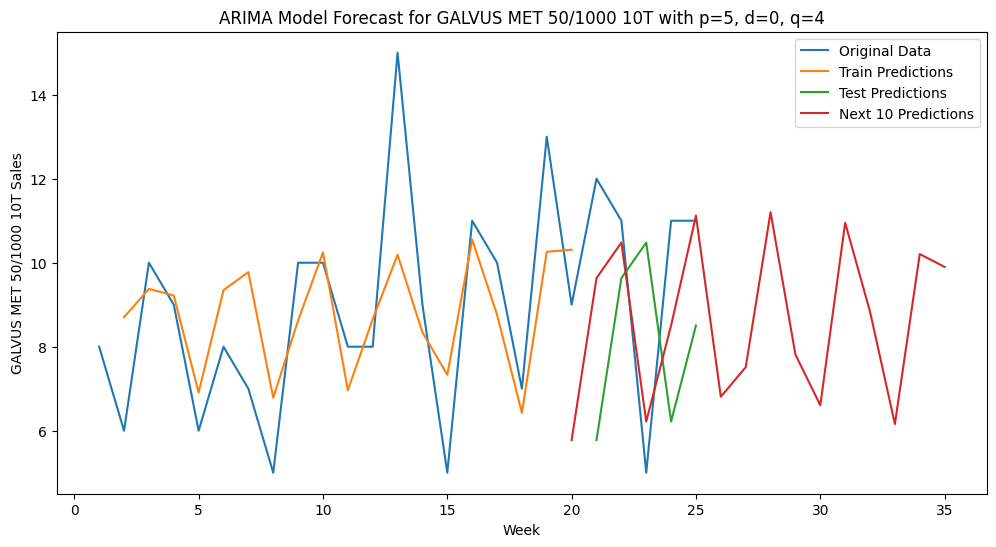

Forecasting for GALVUS MET 50/500MG 15 with p=5, d=0, q=4...
Forecasted values:
20    15.920475
21     9.142040
22    11.486019
23    13.406596
24     9.678198
25    10.512759
26    12.119483
27    11.815370
28    11.742909
29    12.823032
30    12.605710
31    12.200645
32    12.112257
33    11.921042
34    11.514842
35    11.509734
Name: predicted_mean, dtype: float64
R2 score for training set: 0.372
R2 score for test set: -1.342


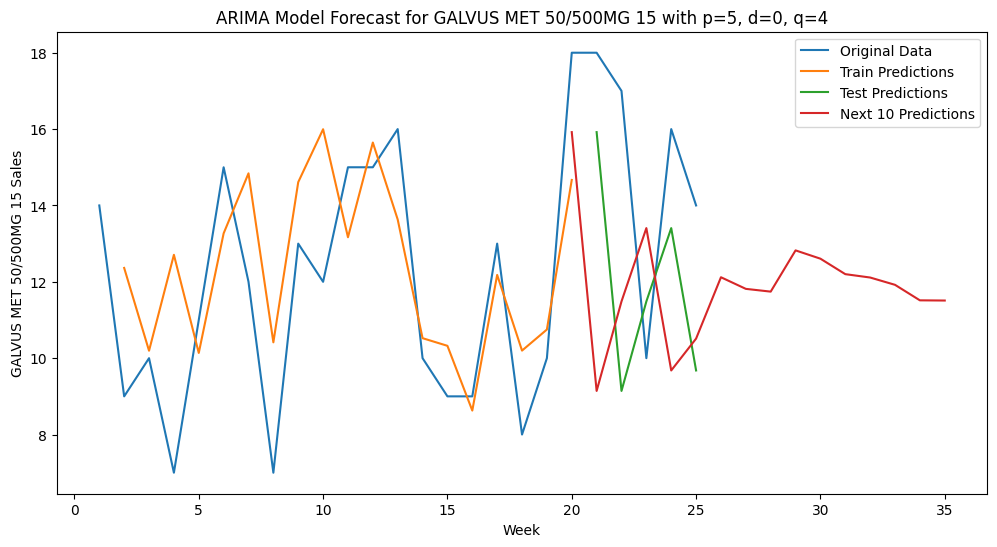

Forecasting for GEMER 1MG 10T with p=5, d=0, q=3...
Forecasted values:
20    22.763040
21    21.172695
22    19.356415
23    22.790245
24    15.966172
25    21.992003
26    24.627677
27    22.045160
28    21.301053
29    25.964117
30    21.199598
31    19.240728
32    23.295481
33    22.421173
34    18.829669
35    23.307854
Name: predicted_mean, dtype: float64
R2 score for training set: 0.434
R2 score for test set: -1.597


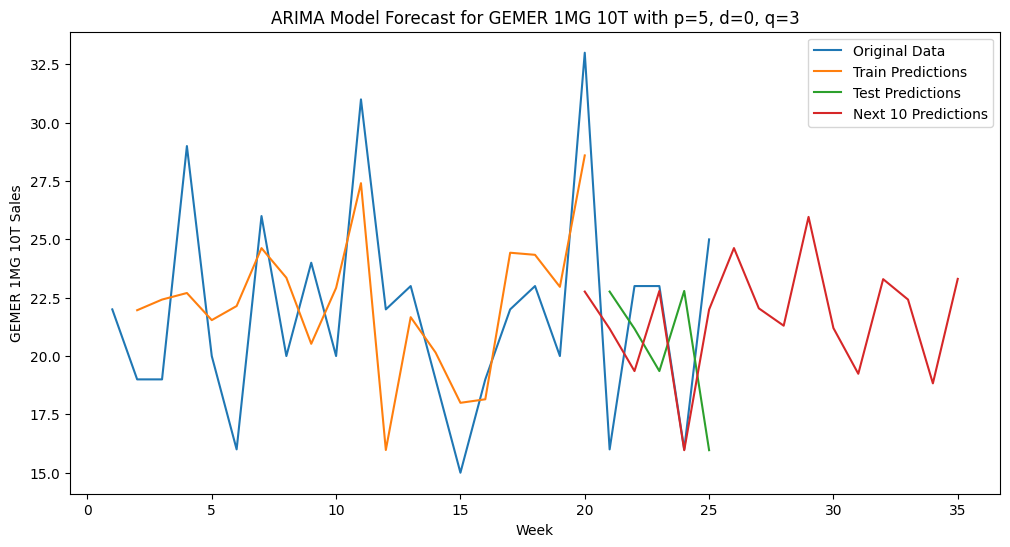

Forecasting for GEMER 2 10T with p=5, d=0, q=3...
Forecasted values:
20    13.806217
21     9.014867
22     9.057680
23     9.637462
24    10.865383
25     9.584472
26     9.829610
27    11.150730
28    12.902937
29    13.026013
30    12.801475
31    12.784865
32    12.901277
33    12.140910
34    10.939302
35    10.029124
Name: predicted_mean, dtype: float64
R2 score for training set: 0.389
R2 score for test set: -0.018


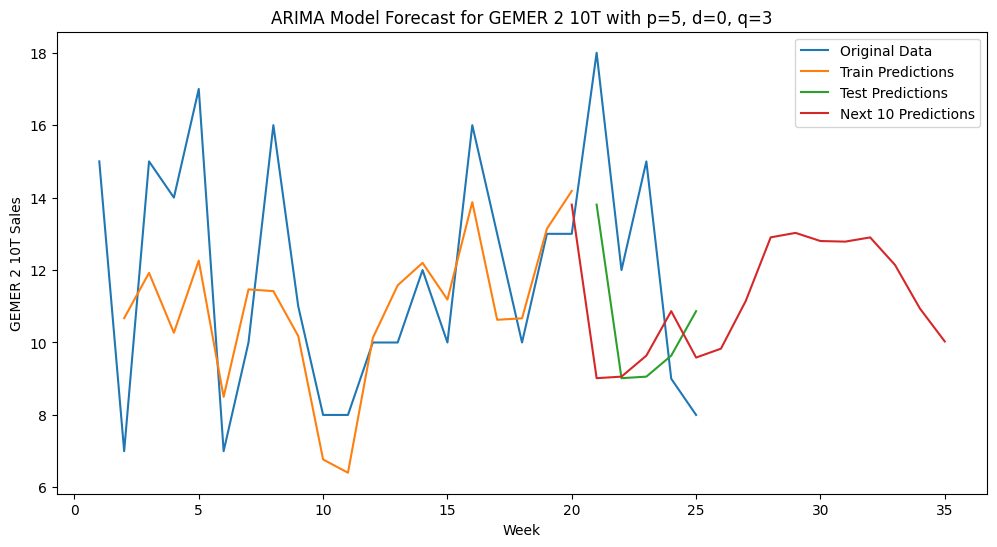

Forecasting for GLIMESTAR M1 10T with p=5, d=0, q=4...
Forecasted values:
20    3.745554
21    6.000421
22    4.288279
23    3.934925
24    5.264861
25    2.326120
26    4.350839
27    3.269154
28    2.422457
29    4.764738
30    2.405745
31    4.359125
32    4.522452
33    3.088249
34    5.699457
35    3.432633
Name: predicted_mean, dtype: float64
R2 score for training set: 0.470
R2 score for test set: 0.814


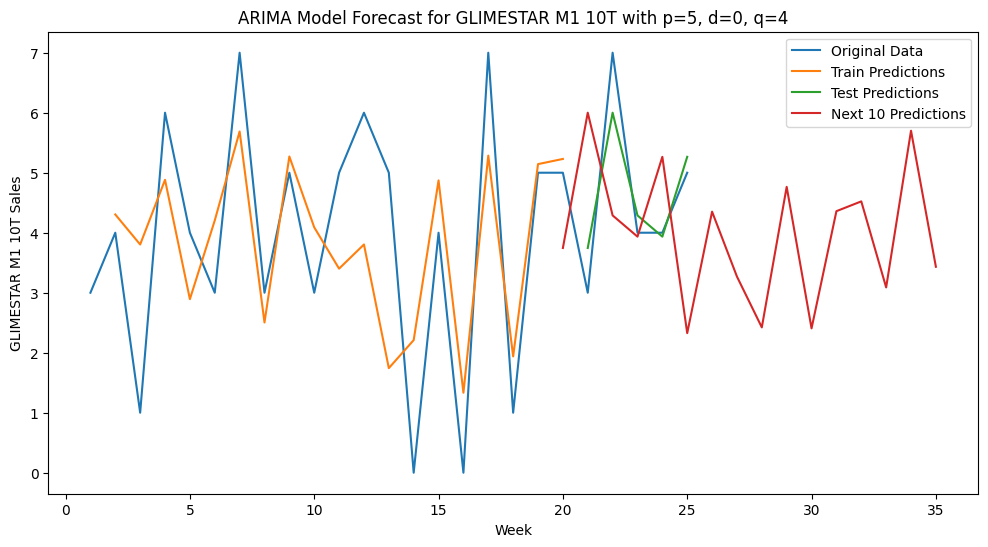

Forecasting for GLIMESTAR M2 10T with p=5, d=0, q=2...
Forecasted values:
20     9.648569
21    11.636177
22    10.612269
23     8.863402
24    10.152285
25    11.990996
26    10.723695
27     8.961160
28    10.288189
29    12.034868
30    10.682108
31     8.971169
32    10.361724
33    12.043289
34    10.619934
35     8.971097
Name: predicted_mean, dtype: float64
R2 score for training set: 0.080
R2 score for test set: -0.763


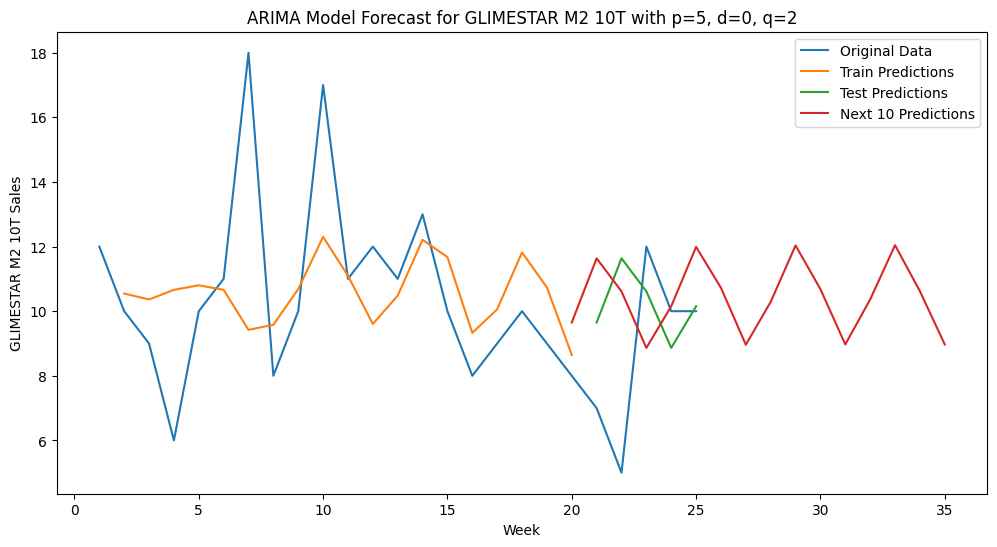

Forecasting for GLIMIPREX MF 1/500 10T with p=5, d=0, q=2...
Forecasted values:
20    17.643476
21    13.145643
22    17.215938
23    14.670534
24    12.022991
25    14.556522
26    12.162044
27    11.654883
28    12.550788
29    11.787661
30    11.469499
31    12.694286
32    12.007670
33    12.787704
34    13.180058
35    13.563054
Name: predicted_mean, dtype: float64
R2 score for training set: 0.405
R2 score for test set: -1.525


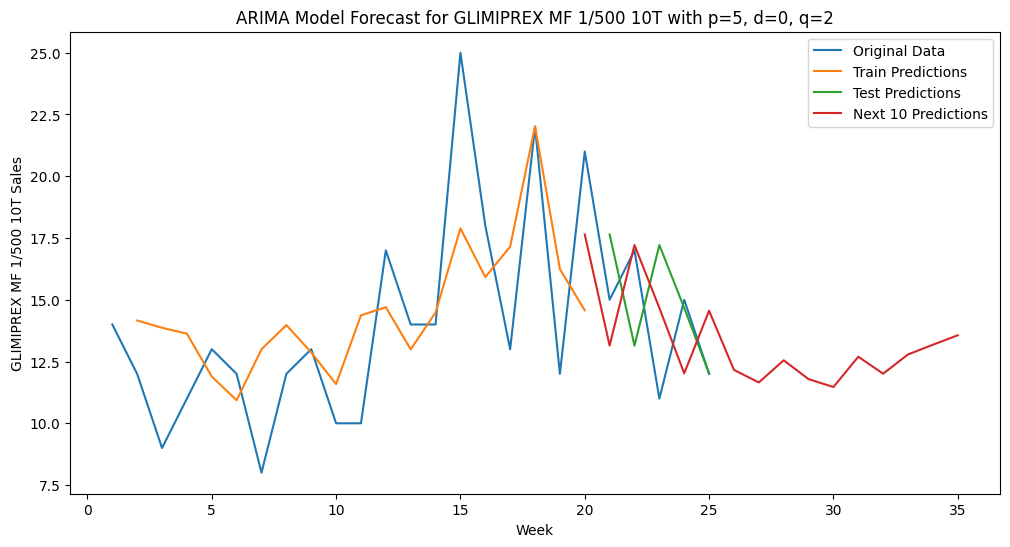

Forecasting for GLIMIPREX MF 2/500 10T with p=5, d=0, q=4...
Forecasted values:
20    37.337538
21    41.037458
22    33.314651
23    44.312365
24    39.314249
25    42.940621
26    36.338929
27    45.191735
28    38.219968
29    42.587811
30    36.738187
31    44.368212
32    37.121940
33    42.539709
34    37.049102
35    43.909911
Name: predicted_mean, dtype: float64
R2 score for training set: 0.463
R2 score for test set: -1.168


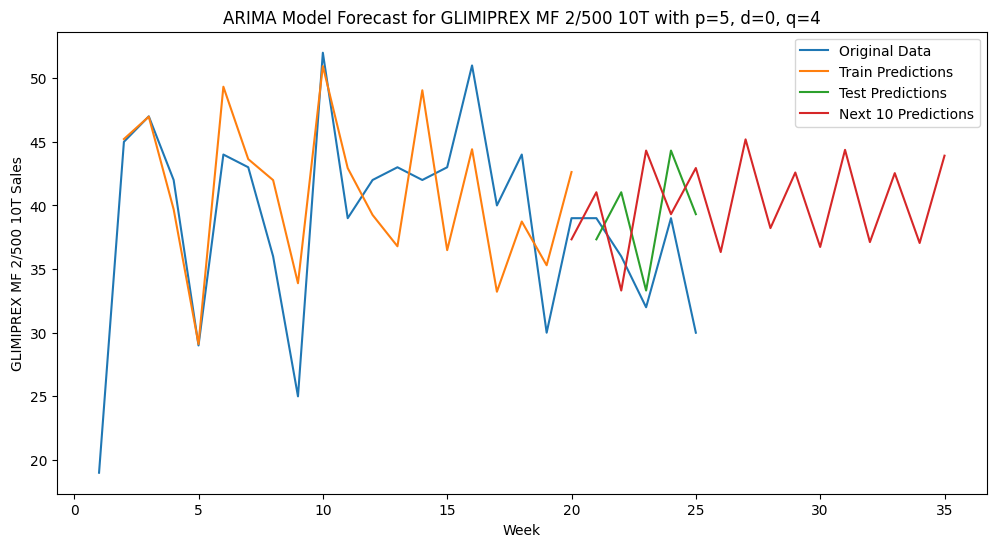

Forecasting for GLIMISAVE M1 15T with p=4, d=0, q=4...
Forecasted values:
20    38.528781
21    38.864361
22    39.916062
23    39.731344
24    40.179534
25    39.882465
26    39.493410
27    39.181473
28    38.810233
29    38.782684
30    38.906384
31    39.189557
32    39.521121
33    39.735146
34    39.803239
35    39.687531
Name: predicted_mean, dtype: float64
R2 score for training set: 0.130
R2 score for test set: -0.302


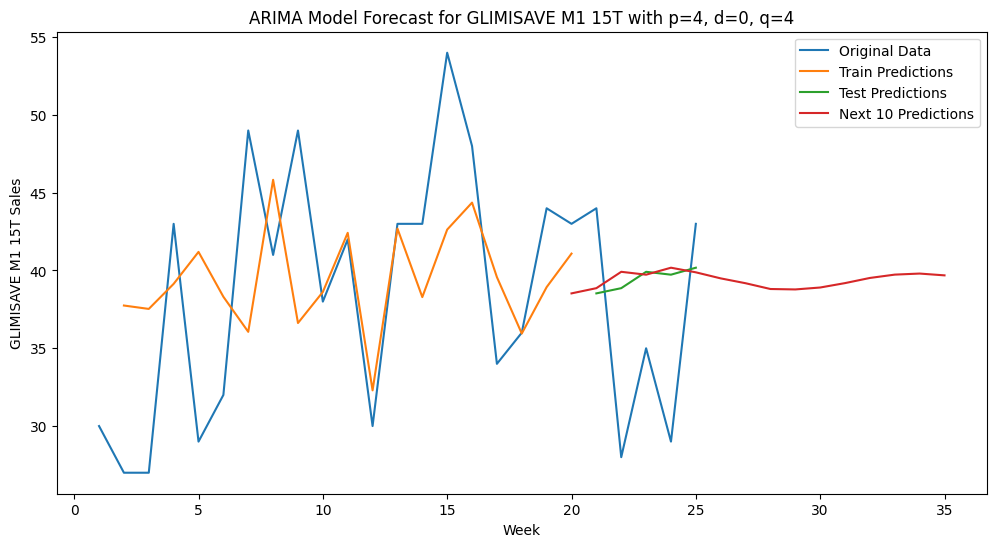

Forecasting for GLIMISAVE M2 15T with p=5, d=0, q=2...
Forecasted values:
20    37.179831
21    40.293790
22    34.843496
23    38.981819
24    40.900543
25    43.858856
26    42.173198
27    39.328476
28    36.694936
29    37.318893
30    40.124793
31    42.861526
32    42.940616
33    40.460454
34    37.605130
35    36.946801
Name: predicted_mean, dtype: float64
R2 score for training set: 0.421
R2 score for test set: -3.977


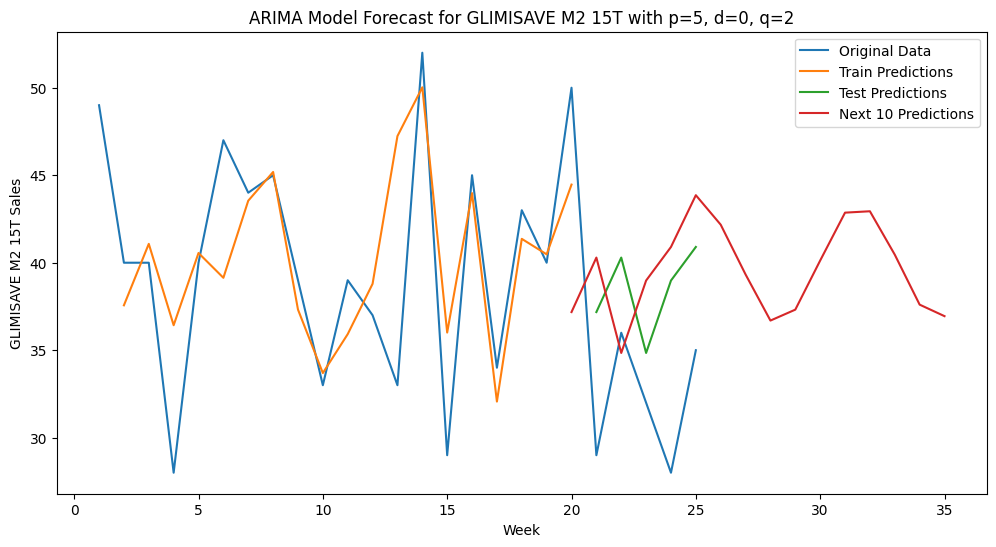

Forecasting for GLIMISAVE M2 FORTE 15T with p=5, d=0, q=4...
Forecasted values:
20    36.356078
21    37.929803
22    32.322254
23    40.970392
24    30.567948
25    40.631581
26    32.594037
27    37.501688
28    36.324973
29    33.840875
30    39.279611
31    32.018796
32    39.756139
33    32.870572
34    37.819975
35    35.484131
Name: predicted_mean, dtype: float64
R2 score for training set: 0.540
R2 score for test set: -0.486


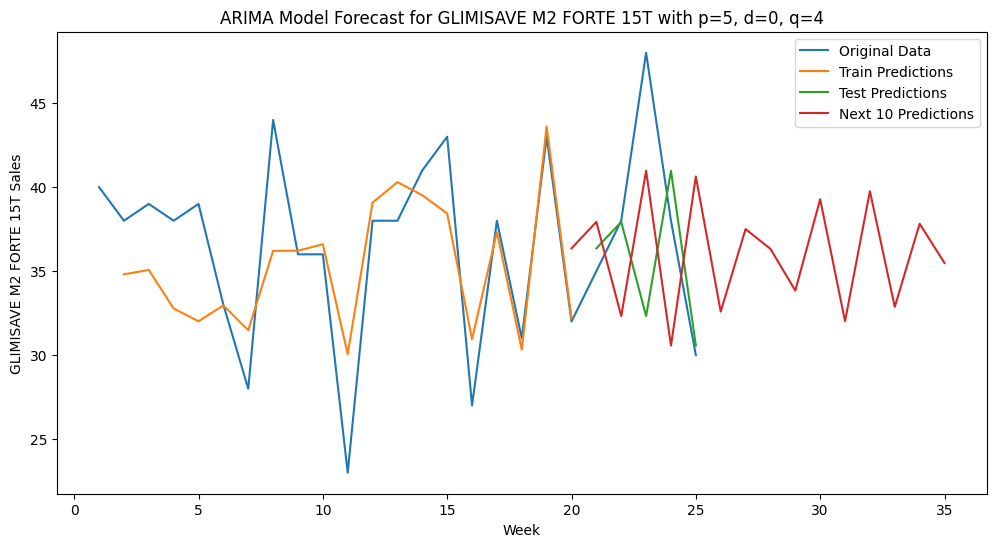

Forecasting for GLYCIPHAGE 500MG 20T with p=5, d=0, q=4...
Forecasted values:
20    33.435682
21    43.122413
22    44.431521
23    37.014709
24    31.172664
25    26.436911
26    30.245639
27    40.225930
28    43.053422
29    40.946219
30    34.195139
31    26.265986
32    28.685848
33    35.813713
34    41.305346
35    43.690741
Name: predicted_mean, dtype: float64
R2 score for training set: 0.667
R2 score for test set: -1.100


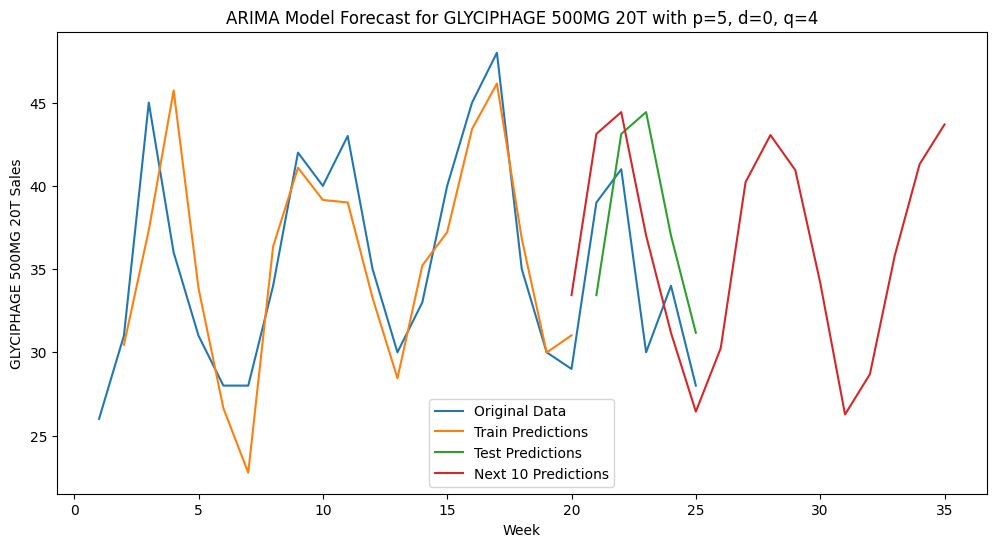

In [78]:

# Load data
data = pd.read_csv('/content/drive/MyDrive/BE MAJOR PROJECT/AllAlreadyStationaryData - Sheet1.csv', index_col=0)
products = list(data.columns)

# Loop through products
for product in products:
    p = medicines[product]['p']
    d = medicines[product]['d']
    q = medicines[product]['q']
    print(f"Forecasting for {product} with p={p}, d={d}, q={q}...")
    
    # Split data into train and test sets
    arima_train = data[product][:int(0.8*len(data))]
    arima_test = data[product][int(0.8*len(data)):]

    # Fit ARIMA model
    arima_model = ARIMA(arima_train, order=(p, d, q))
    arima_model_fit = arima_model.fit()

    # Predict on train and test sets
    arima_train_predict = arima_model_fit.predict(start=1, end=len(arima_train)-1, dynamic=False)
    arima_test_predict = arima_model_fit.predict(start=len(arima_train), end=len(data)-1, dynamic=False)

    # Forecast the next 10 values
    arima_forecast =arima_model_fit.forecast(steps=16)
    predicted_values.append(arima_forecast)

    # Print and plot the forecasted values
    print("Forecasted values:")
    print(arima_forecast)

    # Calculate R2 score for train and test sets
    r2_train = r2_score(arima_train[1:], arima_train_predict)
    r2_test = r2_score(arima_test, arima_test_predict)

    # Print R2 score for train and test sets
    print(f"R2 score for training set: {r2_train:.3f}")
    print(f"R2 score for test set: {r2_test:.3f}") 

    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[product], label='Original Data')
    plt.plot(arima_train.index[1:], arima_train_predict, label='Train Predictions')
    plt.plot(arima_test.index, arima_test_predict, label='Test Predictions')
    plt.plot(arima_forecast.index, arima_forecast.values, label='Next 10 Predictions')
    plt.xlabel('Week')
    plt.ylabel(f'{product} Sales')
    plt.title(f'ARIMA Model Forecast for {product} with p={p}, d={d}, q={q}')
    plt.legend()
    plt.show()


In [75]:
medicines = {
    'AMARYL M 1MG 15T': {'p': 3, 'd': 1, 'q': 0},
    'AZULIX 2MF 10T': {'p': 2, 'd': 0, 'q': 0},
    'AZULIX 2MF FORTE 10T': {'p': 2, 'd': 1, 'q': 2},
    'EUCLIDE 80 10T': {'p': 0, 'd': 0, 'q': 3},
    'GALVUS MET 50/1000 10T': {'p': 0, 'd': 1, 'q': 3},
    'GALVUS MET 50/500MG 15': {'p': 0, 'd': 1, 'q': 0},
    'GEMER 1MG 10T': {'p': 3, 'd': 0, 'q': 4},
    'GEMER 2 10T': {'p': 2, 'd': 0, 'q': 0},
    'GLIMESTAR M1 10T': {'p': 3, 'd': 1, 'q': 3},
    'GLIMESTAR M2 10T': {'p': 3, 'd': 1, 'q': 3},
    'GLIMIPREX MF 1/500 10T': {'p': 1, 'd': 1, 'q': 2},
    'GLIMIPREX MF 2/500 10T': {'p': 2, 'd': 0, 'q': 3},
    'GLIMISAVE M1 15T': {'p': 0, 'd': 0, 'q': 1},
    'GLIMISAVE M2 15T': {'p': 3, 'd': 1, 'q': 0},
    'GLIMISAVE M2 FORTE 15T': {'p': 4, 'd': 0, 'q': 2},
    'GLYCIPHAGE 500MG 20T': {'p': 1, 'd': 0, 'q': 3}
    }

Forecasting for AMARYL M 1MG 15T with p=3, d=1, q=0...
Forecasted values:
20    8.762696
21    7.567196
22    8.670742
23    9.037260
24    8.335883
25    8.508008
26    8.688117
27    8.574082
28    8.535507
29    8.597705
30    8.588972
31    8.568665
32    8.578746
33    8.583383
34    8.577694
35    8.577935
Name: predicted_mean, dtype: float64
R2 score for training set: -0.210
R2 score for test set: -0.105


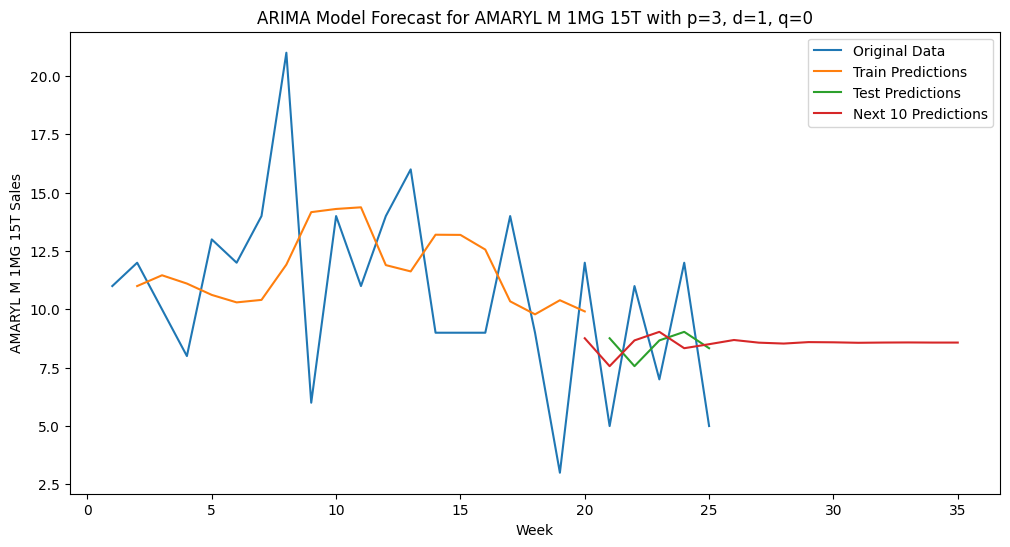

Forecasting for AZULIX 2MF 10T with p=2, d=0, q=0...
Forecasted values:
20     9.180765
21    10.106058
22     8.657301
23     8.611859
24     9.398329
25     9.179416
26     8.827779
27     9.053204
28     9.170993
29     9.014390
30     9.000004
31     9.087946
32     9.068428
33     9.027575
34     9.050611
35     9.065271
Name: predicted_mean, dtype: float64
R2 score for training set: 0.340
R2 score for test set: 0.151


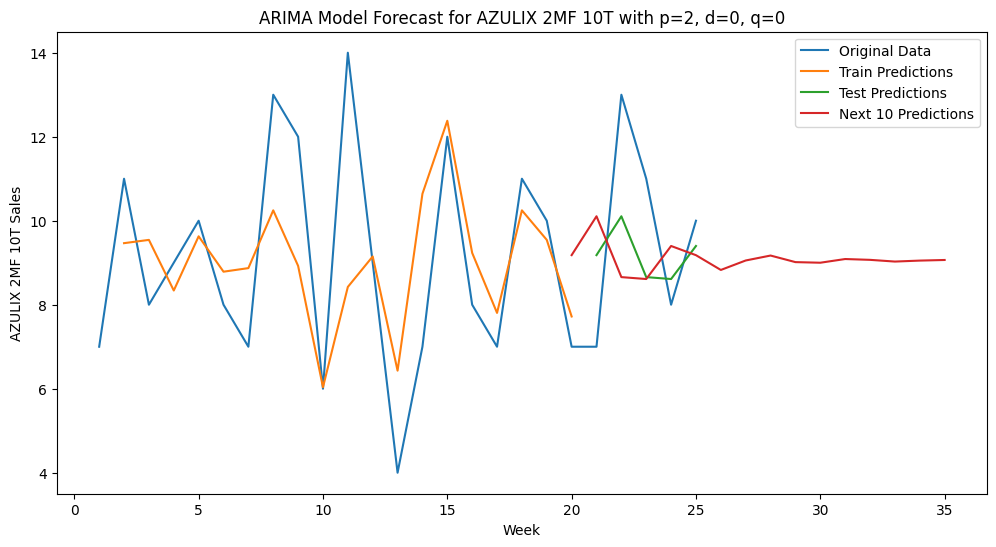

Forecasting for AZULIX 2MF FORTE 10T with p=2, d=1, q=2...
Forecasted values:
20    11.106189
21     6.179658
22    11.549364
23     6.547986
24    11.442211
25     6.729341
26    11.291186
27     6.882931
28    11.145078
29     7.024919
30    11.008045
31     7.157464
32    10.879933
33     7.281321
34    10.760199
35     7.397072
Name: predicted_mean, dtype: float64
R2 score for training set: 0.057
R2 score for test set: -1.076


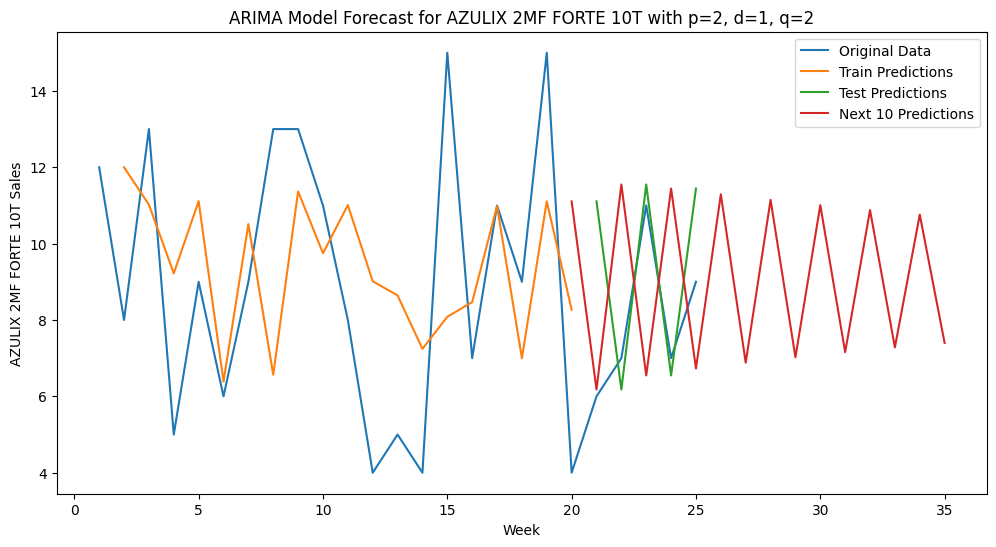

Forecasting for EUCLIDE 80 10T with p=0, d=0, q=3...
Forecasted values:
20    10.771486
21     7.346848
22    10.751554
23     9.947617
24     9.947617
25     9.947617
26     9.947617
27     9.947617
28     9.947617
29     9.947617
30     9.947617
31     9.947617
32     9.947617
33     9.947617
34     9.947617
35     9.947617
Name: predicted_mean, dtype: float64
R2 score for training set: 0.238
R2 score for test set: 0.519


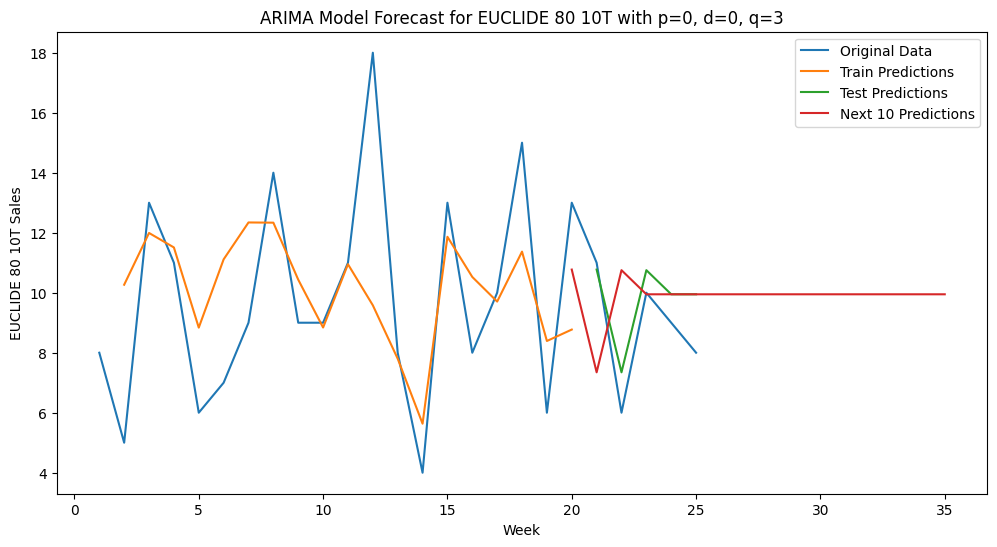

Forecasting for GALVUS MET 50/1000 10T with p=0, d=1, q=3...
Forecasted values:
20     8.231423
21    10.274353
22     9.607819
23     9.607819
24     9.607819
25     9.607819
26     9.607819
27     9.607819
28     9.607819
29     9.607819
30     9.607819
31     9.607819
32     9.607819
33     9.607819
34     9.607819
35     9.607819
Name: predicted_mean, dtype: float64
R2 score for training set: 0.059
R2 score for test set: -0.245


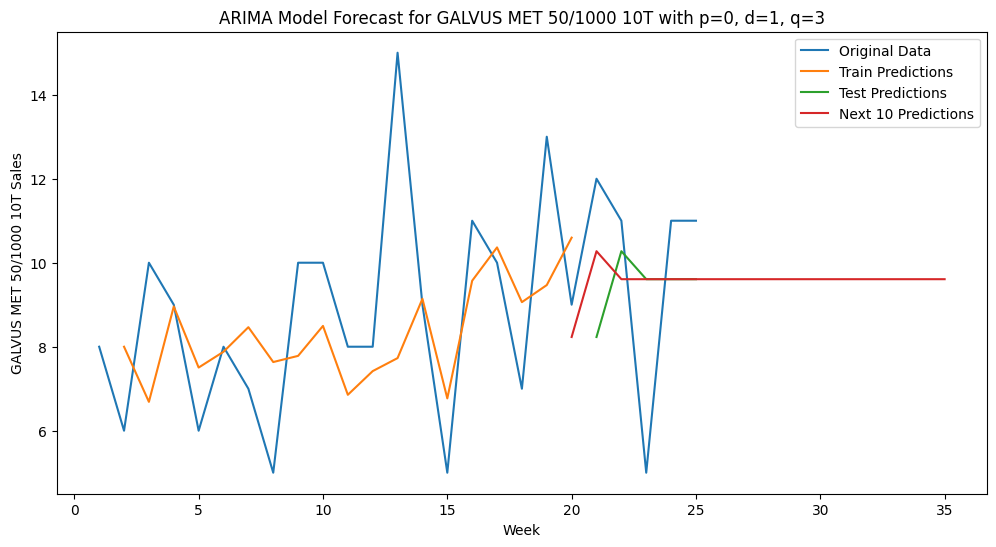

Forecasting for GALVUS MET 50/500MG 15 with p=0, d=1, q=0...
Forecasted values:
20    18.0
21    18.0
22    18.0
23    18.0
24    18.0
25    18.0
26    18.0
27    18.0
28    18.0
29    18.0
30    18.0
31    18.0
32    18.0
33    18.0
34    18.0
35    18.0
Name: predicted_mean, dtype: float64
R2 score for training set: -0.609
R2 score for test set: -1.125


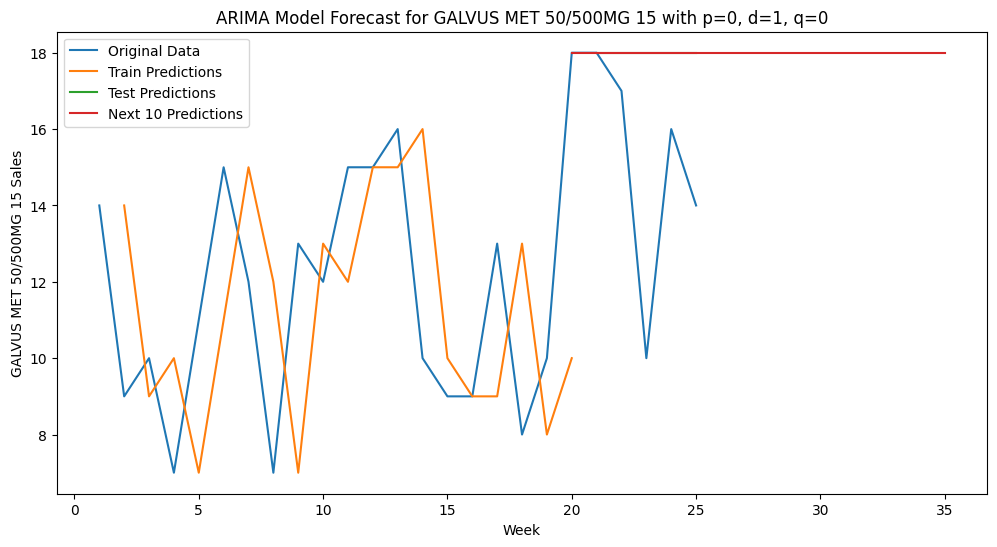

Forecasting for GEMER 1MG 10T with p=3, d=0, q=4...
Forecasted values:
20    20.072438
21    21.082532
22    20.620995
23    19.175446
24    21.134137
25    21.848990
26    23.541944
27    22.995086
28    22.686782
29    21.294416
30    21.081549
31    20.898704
32    21.732513
33    22.145604
34    22.611630
35    22.308955
Name: predicted_mean, dtype: float64
R2 score for training set: 0.396
R2 score for test set: 0.304


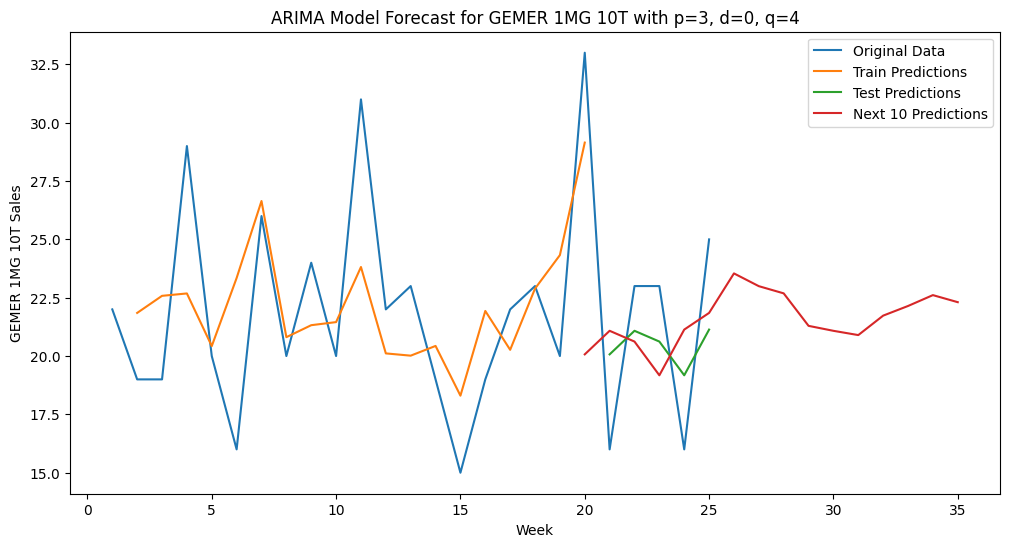

Forecasting for GEMER 2 10T with p=2, d=0, q=0...
Forecasted values:
20    11.362182
21    11.539179
22    11.806279
23    11.746482
24    11.706265
25    11.721062
26    11.726491
27    11.723318
28    11.722712
29    11.723332
30    11.723371
31    11.723259
32    11.723264
33    11.723283
34    11.723280
35    11.723277
Name: predicted_mean, dtype: float64
R2 score for training set: 0.036
R2 score for test set: -0.095


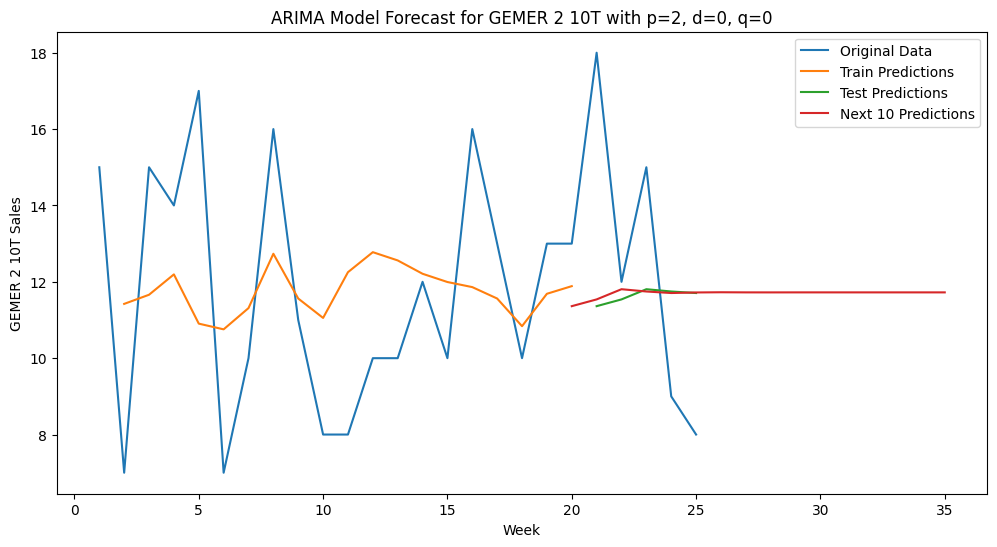

Forecasting for GLIMESTAR M1 10T with p=3, d=1, q=3...
Forecasted values:
20    2.724214
21    5.095867
22    3.041352
23    3.892307
24    4.492779
25    2.869361
26    4.677033
27    3.513758
28    3.583470
29    4.517970
30    3.107819
31    4.310615
32    3.830180
33    3.453029
34    4.424597
35    3.358585
Name: predicted_mean, dtype: float64
R2 score for training set: 0.237
R2 score for test set: 0.469


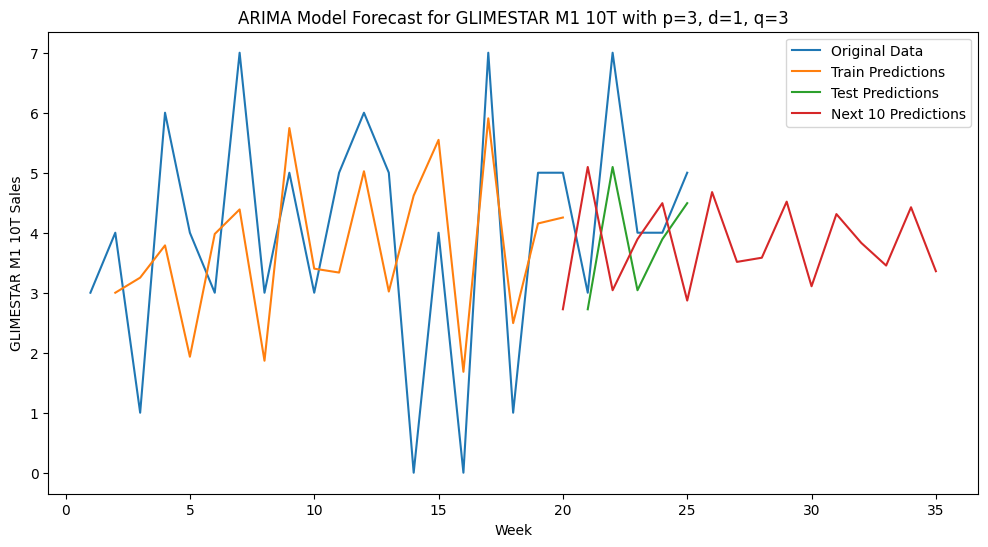

Forecasting for GLIMESTAR M2 10T with p=3, d=1, q=3...
Forecasted values:
20    10.409762
21    10.421907
22    10.740871
23    10.597458
24    10.653961
25    10.686891
26    10.588128
27    10.728497
28    10.571476
29    10.723145
30    10.593922
31    10.689620
32    10.632360
33    10.651820
34    10.665127
35    10.627024
Name: predicted_mean, dtype: float64
R2 score for training set: -0.121
R2 score for test set: -0.409


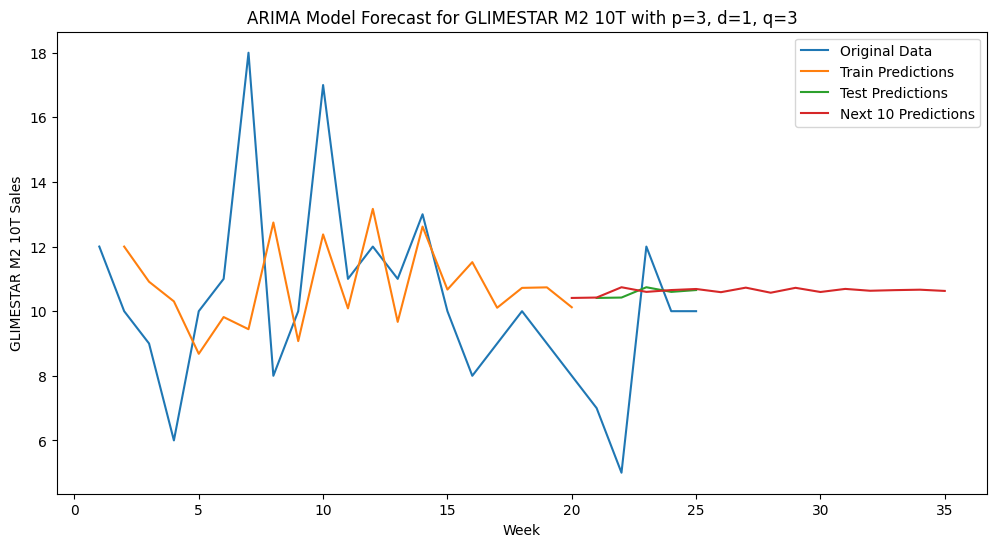

Forecasting for GLIMIPREX MF 1/500 10T with p=1, d=1, q=2...
Forecasted values:
20    15.881501
21    17.117290
22    17.097739
23    17.098048
24    17.098043
25    17.098043
26    17.098043
27    17.098043
28    17.098043
29    17.098043
30    17.098043
31    17.098043
32    17.098043
33    17.098043
34    17.098043
35    17.098043
Name: predicted_mean, dtype: float64
R2 score for training set: 0.216
R2 score for test set: -1.849


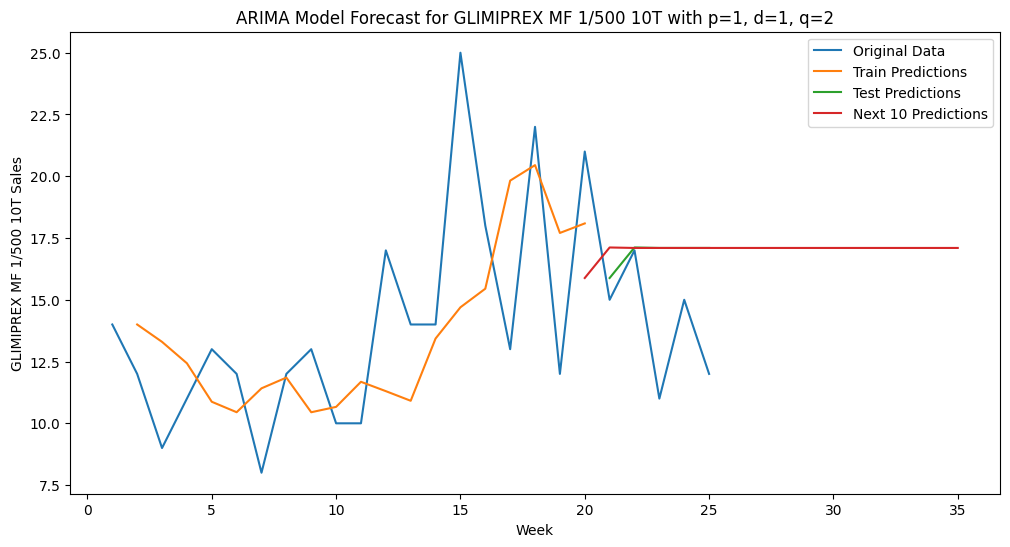

Forecasting for GLIMIPREX MF 2/500 10T with p=2, d=0, q=3...
Forecasted values:
20    38.533345
21    42.027674
22    37.766018
23    42.675098
24    37.985909
25    42.665580
26    38.045621
27    42.618665
28    38.094976
29    42.570547
30    38.142752
31    42.523322
32    38.189484
33    42.477092
34    38.235221
35    42.431842
Name: predicted_mean, dtype: float64
R2 score for training set: 0.374
R2 score for test set: -1.202


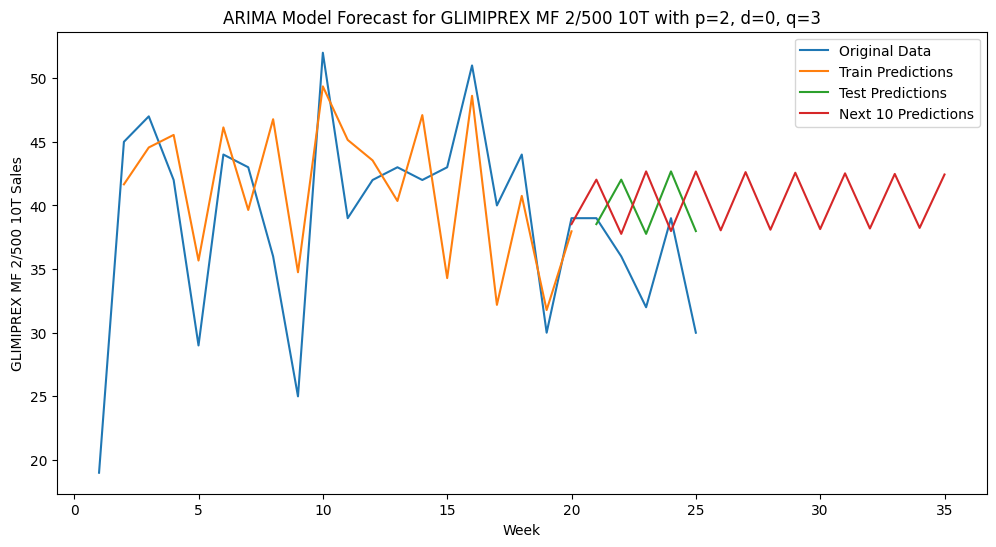

Forecasting for GLIMISAVE M1 15T with p=0, d=0, q=1...
Forecasted values:
20    39.652947
21    39.054453
22    39.054453
23    39.054453
24    39.054453
25    39.054453
26    39.054453
27    39.054453
28    39.054453
29    39.054453
30    39.054453
31    39.054453
32    39.054453
33    39.054453
34    39.054453
35    39.054453
Name: predicted_mean, dtype: float64
R2 score for training set: 0.054
R2 score for test set: -0.209


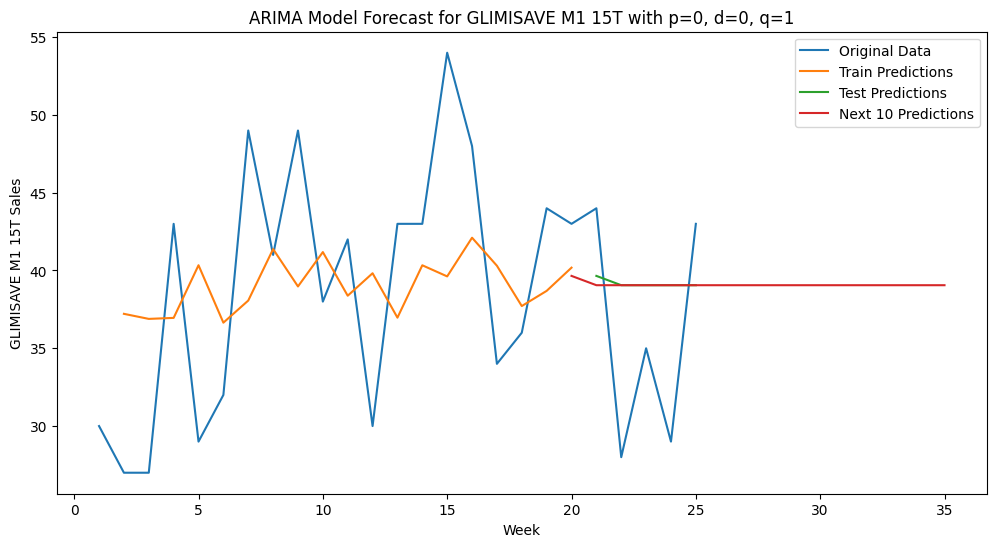

Forecasting for GLIMISAVE M2 15T with p=3, d=1, q=0...
Forecasted values:
20    41.693123
21    46.475128
22    43.044597
23    45.899280
24    43.719581
25    45.306020
26    44.120416
27    45.021448
28    44.342731
29    44.851076
30    44.469237
31    44.756614
32    44.540535
33    44.702896
34    44.580860
35    44.672607
Name: predicted_mean, dtype: float64
R2 score for training set: -0.413
R2 score for test set: -14.785


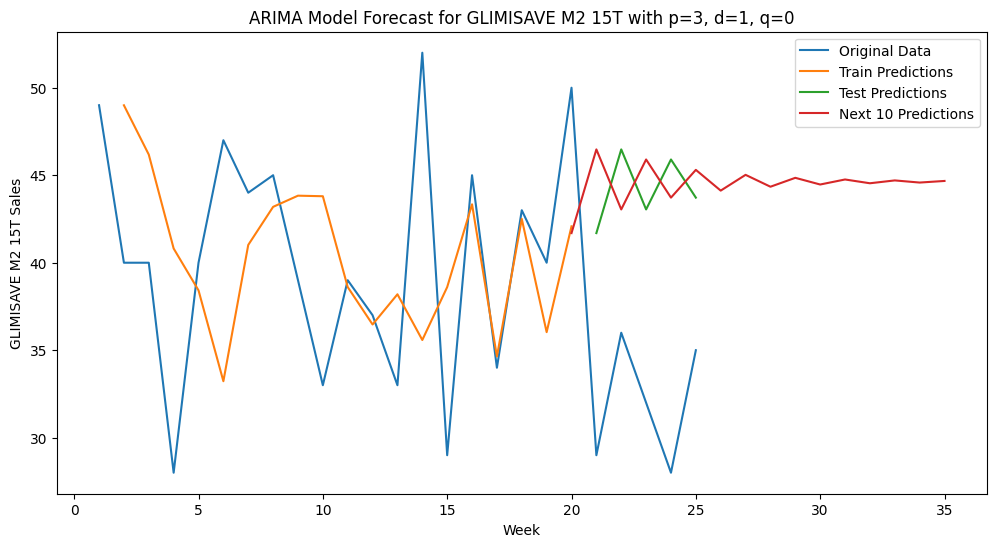

Forecasting for GLIMISAVE M2 FORTE 15T with p=4, d=0, q=2...
Forecasted values:
20    36.519664
21    35.786205
22    34.910060
23    40.033671
24    31.034255
25    41.030345
26    30.738759
27    40.956517
28    32.670427
29    37.773940
30    35.946502
31    34.290262
32    39.483411
33    31.530172
34    41.139906
35    30.919924
Name: predicted_mean, dtype: float64
R2 score for training set: 0.490
R2 score for test set: -0.063


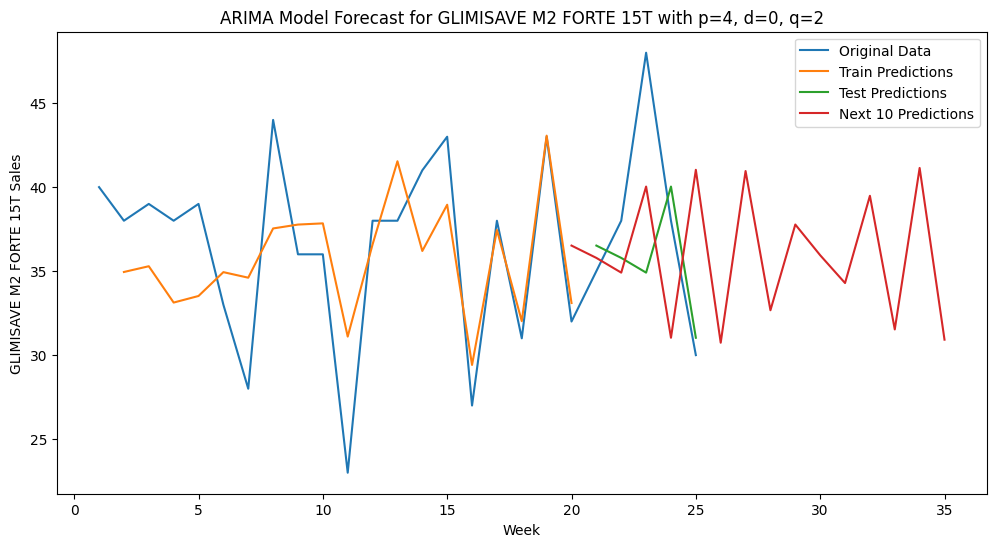

Forecasting for GLYCIPHAGE 500MG 20T with p=1, d=0, q=3...
Forecasted values:
20    31.064073
21    35.047677
22    39.326935
23    36.088979
24    35.941517
25    35.934802
26    35.934496
27    35.934482
28    35.934481
29    35.934481
30    35.934481
31    35.934481
32    35.934481
33    35.934481
34    35.934481
35    35.934481
Name: predicted_mean, dtype: float64
R2 score for training set: 0.483
R2 score for test set: -1.019


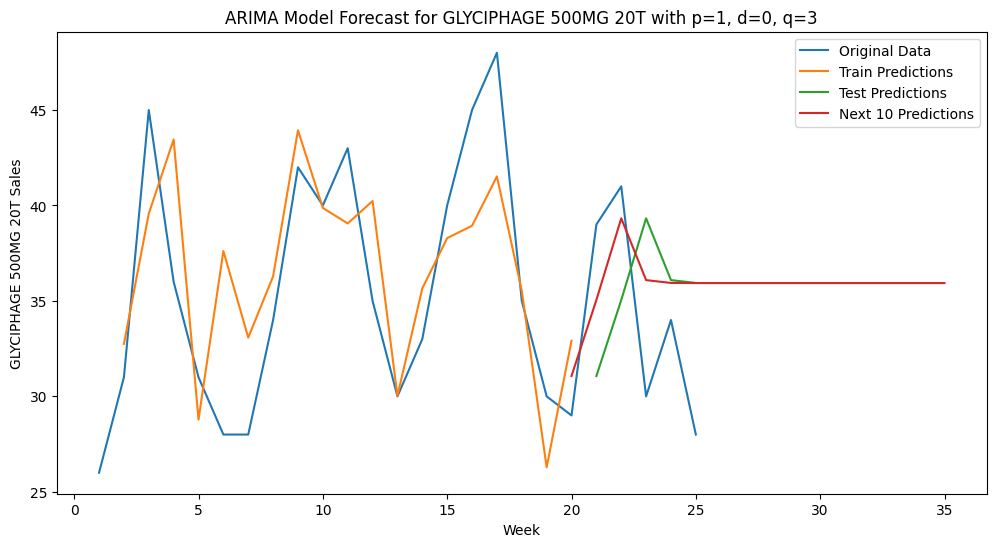

In [76]:
# Load data
data = pd.read_csv('/content/drive/MyDrive/BE MAJOR PROJECT/AllAlreadyStationaryData - Sheet1.csv', index_col=0)
products = list(data.columns)

# Loop through products
for product in products:
    p = medicines[product]['p']
    d = medicines[product]['d']
    q = medicines[product]['q']
    print(f"Forecasting for {product} with p={p}, d={d}, q={q}...")
    
    # Split data into train and test sets
    arima_train = data[product][:int(0.8*len(data))]
    arima_test = data[product][int(0.8*len(data)):]

    # Fit ARIMA model
    arima_model = ARIMA(arima_train, order=(p, d, q))
    arima_model_fit = arima_model.fit()

    # Predict on train and test sets
    arima_train_predict = arima_model_fit.predict(start=1, end=len(arima_train)-1, dynamic=False)
    arima_test_predict = arima_model_fit.predict(start=len(arima_train), end=len(data)-1, dynamic=False)

    # Forecast the next 10 values
    arima_forecast =arima_model_fit.forecast(steps=16)
    predicted_values.append(arima_forecast)

    # Print and plot the forecasted values
    print("Forecasted values:")
    print(arima_forecast)

    # Calculate R2 score for train and test sets
    r2_train = r2_score(arima_train[1:], arima_train_predict)
    r2_test = r2_score(arima_test, arima_test_predict)

    # Print R2 score for train and test sets
    print(f"R2 score for training set: {r2_train:.3f}")
    print(f"R2 score for test set: {r2_test:.3f}") 

    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[product], label='Original Data')
    plt.plot(arima_train.index[1:], arima_train_predict, label='Train Predictions')
    plt.plot(arima_test.index, arima_test_predict, label='Test Predictions')
    plt.plot(arima_forecast.index, arima_forecast.values, label='Next 10 Predictions')
    plt.xlabel('Week')
    plt.ylabel(f'{product} Sales')
    plt.title(f'ARIMA Model Forecast for {product} with p={p}, d={d}, q={q}')
    plt.legend()
    plt.show()
